# Importation du module COT

In [2]:
from COT import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Récupération des données

In [25]:
df_commercials = merge_futures_positions('commercials')
df_large_spec = merge_futures_positions('large_speculators')
df_retail = merge_futures_positions('retail')

# Filtration des contrats Futures majeurs

In [26]:
df_commercials, df_large_spec, df_retail = test_filtrer(df_commercials,df_large_spec,df_retail)

The missing contracts are  {'ORANGE JUICE', 'OATS', 'COFFEE', 'USD INDEX', 'MSCI EM INDEX', 'COTTON', 'SUGAR', 'COCOA (3)'}


In [5]:
df_large_spec

CONTRACT      ID  OPEN INTEREST  CURR. LONG POS.  \
0                         WHEAT  001602         396009           124909   
2                          CORN  002602        1610391           281214   
3                       SOYBEAN  005602         769700            86975   
4                   SOYBEAN OIL  007601         556400           105702   
5                 30-YEAR BONDS  020601        1434869           185581   
6           ULTRA 30-YEAR BONDS  020604        1673295           165750   
7                  SOYBEAN MEAL  026603         494513            79737   
9                  2-YEAR NOTES  042601        3974204           374316   
10                10-YEAR NOTES  043602        4735241           489605   
11          ULTRA 10-YEAR BONDS  043607        2202726           279753   
13                 5-YEAR NOTES  044601        5900715           417558   
14                    FED FUNDS  045601        1937647           259866   
16                    DOW JONES  124603         103437            32665   
17   DOW JONES U.S. REAL ESTATE  124606          55849                0   
28                    LEAN HOGS  054642         212171            70928   
29                  LIVE CATTLE  057642         287123            97639   
30                       LUMBER  058644           8360             3828   
31                FEEDER CATTLE  061641          51432            14036   
33              CANADIAN DOLLAR  090741         161519            35698   
34                  SWISS FRANC  092741          55069            12689   
35                 MEXICAN PESO  095741         265257           147176   
36                BRITISH POUND  096742         199070            90545   
37                 JAPANESE YEN  097741         304592            58554   
38                      EURO FX  099741         740105           210848   
40               BRAZILIAN REAL  102741          55671            32621   
41           NEW ZEALAND DOLLAR  112741          41827            19632   
42           SOUTH AFRICAN RAND  122741          10123             3920   
43                      BITCOIN  133741          24769            19147   
44                MICRO BITCOIN  133742          19838            14248   
45                      SOFR-3M  134741       10503727          1910959   
46                      SOFR-1M  134742         918013           158099   
50                 S&P 500 (ES)  13874A        2338964           292466   
57                     ETHEREUM  146021           6449             4570   
58                  MICRO ETHER  146022          18346            14878   
59               NASDAQ - OTHER  20974+         312885            88518   
60                  NASDAQ (NQ)  209742         295946            97292   
62            AUSTRALIAN DOLLAR  232741         199485            47405   
63                 RUSSELL 2000  239742         506742            60783   
66         NIKKEI STOCK AVERAGE  240741          16894             1829   
70                          VIX  1170E1         362470            76506   
72                       SILVER  084691         152544            56785   
73                       COPPER  085692         257761            78229   
74                         GOLD  088691         420812           217505   
79                 ALUMINUM MWP  191693          29219             5039   
81                        STEEL  192651          24090             3117   
213                 HEATING OIL  022651         377975            61696   
215                 NATURAL GAS  023651        1554063           334504   
231                   CRUDE OIL  067651        1715857           308074   
233             BRENT CRUDE OIL  06765T         118848            43272   
236                   PALLADIUM  075651          27855             4317   
237                    PLATINUM  076651          93019            50318   
238               GASOLINE RBOB  111659         388202           105269   

     CURR. SHORT POS.  CURR. NET               

# Mise à jour des bases historiques

In [6]:
update_historic_data(df_commercials, df_large_spec, df_retail)

Le fichier WHEAT a bien ete sauvegardee
Le fichier CORN a bien ete sauvegardee
Le fichier SOYBEAN a bien ete sauvegardee
Le fichier SOYBEAN OIL a bien ete sauvegardee
Le fichier 30-YEAR BONDS a bien ete sauvegardee
Le fichier ULTRA 30-YEAR BONDS a bien ete sauvegardee
Le fichier SOYBEAN MEAL a bien ete sauvegardee
Le fichier 2-YEAR NOTES a bien ete sauvegardee
Le fichier 10-YEAR NOTES a bien ete sauvegardee
Le fichier ULTRA 10-YEAR BONDS a bien ete sauvegardee
Le fichier 5-YEAR NOTES a bien ete sauvegardee
Le fichier FED FUNDS a bien ete sauvegardee
Le fichier DOW JONES a bien ete sauvegardee
Le fichier DOW JONES U.S. REAL ESTATE a bien ete sauvegardee
Le fichier LEAN HOGS a bien ete sauvegardee
Le fichier LIVE CATTLE a bien ete sauvegardee
Le fichier LUMBER a bien ete sauvegardee
Le fichier FEEDER CATTLE a bien ete sauvegardee
Le fichier CANADIAN DOLLAR a bien ete sauvegardee
Le fichier SWISS FRANC a bien ete sauvegardee
Le fichier MEXICAN PESO a bien ete sauvegardee
Le fichier BRITIS

# Code pour les graphiques

In [28]:
    
def plot_nets(df,lookback_period):
 
    index_values = []
    time_periods = {
        '6 months': 185,
        '1 year': 365,
        '1.5 years': 550,
        '2 years': 730,
        '3 years': 1095
    }
    print(df['CONTRACT'])
 
    today = datetime.today().date()
    date_reculee = today - timedelta(days=time_periods[lookback_period])
    date_reculee_datetime = datetime.combine(date_reculee, datetime.min.time())
    
    for i in df['CONTRACT']:

        df_histo = pd.read_excel('historique/'+ i +'.xlsx')
        df_histo['Report_Date_as_MM_DD_YYYY'] = pd.to_datetime(df_histo['Report_Date_as_MM_DD_YYYY'])

        df_lookback = df_histo.loc[df_histo['Report_Date_as_MM_DD_YYYY'] >= date_reculee_datetime]
        net_commercials = df_lookback['Commercials Net Position']
        net_large_spec = df_lookback['Large Speculators Net Position']
        net_small_spec = df_lookback['Small Speculators Net Position']
        open_interest = df_lookback['Open Interest']
        dates = df_lookback['Report_Date_as_MM_DD_YYYY']

        plt.figure(figsize=(15,8))

        plt.fill_between(dates,net_large_spec,color='r',label='Large Speculators')
        plt.fill_between(dates,net_commercials,color='b',label='Commercials')
        plt.fill_between(dates,net_small_spec,color='g',label='Small Speculators')
        plt.legend()



        plt.grid()


        plt.title('Historical Net Positions in ' +i+ ' Future Contract',fontdict={'fontname':'Arial', 'fontweight':'bold','fontsize': 18})



# COMMERCIALS

In [13]:
today = '2024-02-13'
format_string = "%Y-%m-%d"  # Adjust the format according to your date string
# Convert string to datetime
today = datetime.strptime(today, format_string)

date_reculee = today - timedelta(days=365)
date_reculee_datetime = datetime.combine(date_reculee, datetime.min.time())

df_results = pd.DataFrame({})

index_commercials = []

df_commercials = merge_futures_positions('commercials')
df, df_large_spec, df_retail = test_filtrer(df_commercials,df_large_spec,df_retail)

for i in df['CONTRACT']:
    df_histo = pd.read_excel('historique/'+i+'.xlsx')
    df_histo['Report_Date_as_MM_DD_YYYY'] = pd.to_datetime(df_histo['Report_Date_as_MM_DD_YYYY'])

    df_lookback = df_histo.loc[df_histo['Report_Date_as_MM_DD_YYYY'] >= date_reculee_datetime]
    min_net = df_lookback['Commercials Net Position'].min()
    max_net = df_lookback['Commercials Net Position'].max()

    
    index_commercials.append(round(float(100*(df[df['CONTRACT'] == i]['CURR. NET'] - min_net) / (max_net - min_net)),0))


The missing contracts are  {'ORANGE JUICE', 'OATS', 'COFFEE', 'USD INDEX', 'MSCI EM INDEX', 'COTTON', 'SUGAR', 'COCOA (3)'}


In [14]:
today = '2024-02-13'
format_string = "%Y-%m-%d"  # Adjust the format according to your date string
# Convert string to datetime
today = datetime.strptime(today, format_string)

date_reculee = today - timedelta(days=365)
date_reculee_datetime = datetime.combine(date_reculee, datetime.min.time())


index_large_spec = []

df_large_spec = merge_futures_positions('large_speculators')
df_commercials, df, df_retail = test_filtrer(df_commercials,df_large_spec,df_retail)

for i in df['CONTRACT']:
    df_histo = pd.read_excel('historique/'+i+'.xlsx')
    df_histo['Report_Date_as_MM_DD_YYYY'] = pd.to_datetime(df_histo['Report_Date_as_MM_DD_YYYY'])

    df_lookback = df_histo.loc[df_histo['Report_Date_as_MM_DD_YYYY'] >= date_reculee_datetime]
    min_net = df_lookback['Large Speculators Net Position'].min()
    max_net = df_lookback['Large Speculators Net Position'].max()

    
    index_large_spec.append(round(float(100*(df[df['CONTRACT'] == i]['CURR. NET'] - min_net) / (max_net - min_net)),0))


The missing contracts are  {'ORANGE JUICE', 'OATS', 'COFFEE', 'USD INDEX', 'MSCI EM INDEX', 'COTTON', 'SUGAR', 'COCOA (3)'}


In [15]:
today = '2024-02-13'
format_string = "%Y-%m-%d"  # Adjust the format according to your date string
# Convert string to datetime
today = datetime.strptime(today, format_string)

date_reculee = today - timedelta(days=365)
date_reculee_datetime = datetime.combine(date_reculee, datetime.min.time())


index_retail = []

df_retail = merge_futures_positions('retail')
df_commercials, df_large_spec, df = test_filtrer(df_commercials,df_large_spec,df_retail)

for i in df_commercials['CONTRACT']:
    df_histo = pd.read_excel('historique/'+i+'.xlsx')
    df_histo['Report_Date_as_MM_DD_YYYY'] = pd.to_datetime(df_histo['Report_Date_as_MM_DD_YYYY'])

    df_lookback = df_histo.loc[df_histo['Report_Date_as_MM_DD_YYYY'] >= date_reculee_datetime]
    min_net = df_lookback['Small Speculators Net Position'].min()
    max_net = df_lookback['Small Speculators Net Position'].max()

    
    index_retail.append(round(float(100*(df[df['CONTRACT'] == i]['CURR. NET'] - min_net) / (max_net - min_net)),0))

    


The missing contracts are  {'ORANGE JUICE', 'OATS', 'COFFEE', 'USD INDEX', 'MSCI EM INDEX', 'COTTON', 'SUGAR', 'COCOA (3)'}


In [16]:
df_results['CONTRACT'] = df_commercials['CONTRACT']
df_results['COMMERCIALS INDEX'] = index_commercials
df_results['LARGE SPEC INDEX'] = index_large_spec
df_results['RETAIL INDEX'] = index_retail
df_results.to_excel('RESULTS.xlsx')

# Contrats manquants

In [17]:
response = requests.get('https://www.cftc.gov/dea/futures/deanybtsf.htm')
soup = BeautifulSoup(response.text,'html.parser')
text = soup.find('pre').text

list = text.split('\r\n \r\n')
future_name = []
open_interest = []
long_pos = []
short_pos = []
net_pos = []
investors = []
contracts_id = []

investors_type = 'commercials'



columns = ['CONTRACT',
         'ID',
         'OPEN INTEREST',
         'CURR. LONG POS.',
         'CURR. SHORT POS.',
         'CURR. NET',
         'TYPE'
        ]


df_commercials = pd.DataFrame({},columns=columns)

n = len(list)
for i in range(2,n):

    sections = list[i].split('--------------------------------------------------------------------------------')
    if i==2:

        future_name.append(sections[0].split(' -')[0])
    else:
       future_name.append(sections[0].split('\r\n')[1].split(' -')[0])
    contracts_id.append(sections[0].split('Code-')[1].split('\r\n')[0])
    data = sections[1]
    open_interest.append(int(data.split('OPEN INTEREST:')[1].split('\r\n')[0].replace(',', '')))
    positions = sections[1].split('COMMITMENTS\r\n')[1].split('\r\n')[0]
    split_values = positions.split()
    final = [value for value in split_values if value.strip() != '']

    if investors_type=='large_speculators':

        total_long = int(final[0].replace(',',''))
        long_pos.append(total_long)
        total_short = int(final[1].replace(',',''))
        short_pos.append(total_short)

    elif investors_type == 'commercials':

        total_long = int(final[3].replace(',',''))
        long_pos.append(total_long)
        total_short = int(final[4].replace(',',''))
        short_pos.append(total_short)

    elif investors_type == 'retail':

        total_long = int(final[7].replace(',',''))
        long_pos.append(total_long)
        total_short = int(final[8].replace(',',''))
        short_pos.append(total_short)

    net = total_long - total_short
    net_pos.append(net)
    investors.append(investors_type)

df_commercials['CONTRACT'] = future_name
df_commercials['ID'] = contracts_id
df_commercials['OPEN INTEREST'] = open_interest
df_commercials['CURR. LONG POS.'] = long_pos
df_commercials['CURR. SHORT POS.'] = short_pos
df_commercials['CURR. NET'] = net_pos
df_commercials['TYPE'] = investors

df_commercials 

CONTRACT      ID  OPEN INTEREST  CURR. LONG POS.  \
0                    COTTON NO. 2  033661         254149            93505   
1  FRZN CONCENTRATED ORANGE JUICE  040701           8987             3269   
2                           COCOA  073732         271605            85415   
3                    SUGAR NO. 11  080732         884135           493076   
4                        COFFEE C  083731         224284            84398   
5                       USD INDEX  098662          32227             4916   
6                          CANOLA  135731         308702           261625   
7                       MSCI EAFE  244041         430924           382513   
8                   MSCI EM INDEX  244042        1043817           861321   

   CURR. SHORT POS.  CURR. NET         TYPE  
0            186070     -92565  commercials  
1              4861      -1592  commercials  
2            140237     -54822  commercials  
3            605214    -112138  commercials  
4            145840     -61442  commercials  
5              8095      -3179  commercials  
6            112299     149326  commercials  
7            358810      23703  commercials  
8            834954      26367  commercials

In [18]:
response = requests.get('https://www.cftc.gov/dea/futures/deanybtsf.htm')
soup = BeautifulSoup(response.text,'html.parser')
text = soup.find('pre').text

list = text.split('\r\n \r\n')
future_name = []
open_interest = []
long_pos = []
short_pos = []
net_pos = []
investors = []
contracts_id = []

investors_type = 'large_speculators'



columns = ['CONTRACT',
         'ID',
         'OPEN INTEREST',
         'CURR. LONG POS.',
         'CURR. SHORT POS.',
         'CURR. NET',
         'TYPE'
        ]


dfrl = pd.DataFrame({},columns=columns)

n = len(list)
for i in range(2,n):

    sections = list[i].split('--------------------------------------------------------------------------------')
    if i==2:

        future_name.append(sections[0].split(' -')[0])
    else:
       future_name.append(sections[0].split('\r\n')[1].split(' -')[0])
    contracts_id.append(sections[0].split('Code-')[1].split('\r\n')[0])
    data = sections[1]
    open_interest.append(int(data.split('OPEN INTEREST:')[1].split('\r\n')[0].replace(',', '')))
    positions = sections[1].split('COMMITMENTS\r\n')[1].split('\r\n')[0]
    split_values = positions.split()
    final = [value for value in split_values if value.strip() != '']

    if investors_type=='large_speculators':

        total_long = int(final[0].replace(',',''))
        long_pos.append(total_long)
        total_short = int(final[1].replace(',',''))
        short_pos.append(total_short)

    elif investors_type == 'commercials':

        total_long = int(final[3].replace(',',''))
        long_pos.append(total_long)
        total_short = int(final[4].replace(',',''))
        short_pos.append(total_short)

    elif investors_type == 'retail':

        total_long = int(final[7].replace(',',''))
        long_pos.append(total_long)
        total_short = int(final[8].replace(',',''))
        short_pos.append(total_short)

    net = total_long - total_short
    net_pos.append(net)
    investors.append(investors_type)

dfrl['CONTRACT'] = future_name
dfrl['ID'] = contracts_id
dfrl['OPEN INTEREST'] = open_interest
dfrl['CURR. LONG POS.'] = long_pos
dfrl['CURR. SHORT POS.'] = short_pos
dfrl['CURR. NET'] = net_pos
dfrl['TYPE'] = investors

dfrl      

CONTRACT      ID  OPEN INTEREST  CURR. LONG POS.  \
0                    COTTON NO. 2  033661         254149           102360   
1  FRZN CONCENTRATED ORANGE JUICE  040701           8987             3333   
2                           COCOA  073732         271605            95562   
3                    SUGAR NO. 11  080732         884135           184125   
4                        COFFEE C  083731         224284            82479   
5                       USD INDEX  098662          32227            21096   
6                          CANOLA  135731         308702            16080   
7                       MSCI EAFE  244041         430924            33926   
8                   MSCI EM INDEX  244042        1043817           145554   

   CURR. SHORT POS.  CURR. NET               TYPE  
0             18425      83935  large_speculators  
1              2359        974  large_speculators  
2             46211      49351  large_speculators  
3             91970      92155  large_speculators  
4             22395      60084  large_speculators  
5             19094       2002  large_speculators  
6            164996    -148916  large_speculators  
7             61782     -27856  large_speculators  
8            186951     -41397  large_speculators

In [19]:
response = requests.get('https://www.cftc.gov/dea/futures/deanybtsf.htm')
soup = BeautifulSoup(response.text,'html.parser')
text = soup.find('pre').text

list = text.split('\r\n \r\n')
future_name = []
open_interest = []
long_pos = []
short_pos = []
net_pos = []
investors = []
contracts_id = []

investors_type = 'retail'



columns = ['CONTRACT',
         'ID',
         'OPEN INTEREST',
         'CURR. LONG POS.',
         'CURR. SHORT POS.',
         'CURR. NET',
         'TYPE'
        ]


df = pd.DataFrame({},columns=columns)

n = len(list)
for i in range(2,n):

    sections = list[i].split('--------------------------------------------------------------------------------')
    if i==2:

        future_name.append(sections[0].split(' -')[0])
    else:
       future_name.append(sections[0].split('\r\n')[1].split(' -')[0])
    contracts_id.append(sections[0].split('Code-')[1].split('\r\n')[0])
    data = sections[1]
    open_interest.append(int(data.split('OPEN INTEREST:')[1].split('\r\n')[0].replace(',', '')))
    positions = sections[1].split('COMMITMENTS\r\n')[1].split('\r\n')[0]
    split_values = positions.split()
    final = [value for value in split_values if value.strip() != '']

    if investors_type=='large_speculators':

        total_long = int(final[0].replace(',',''))
        long_pos.append(total_long)
        total_short = int(final[1].replace(',',''))
        short_pos.append(total_short)

    elif investors_type == 'commercials':

        total_long = int(final[3].replace(',',''))
        long_pos.append(total_long)
        total_short = int(final[4].replace(',',''))
        short_pos.append(total_short)

    elif investors_type == 'retail':

        total_long = int(final[7].replace(',',''))
        long_pos.append(total_long)
        total_short = int(final[8].replace(',',''))
        short_pos.append(total_short)

    net = total_long - total_short
    net_pos.append(net)
    investors.append(investors_type)

df['CONTRACT'] = future_name
df['ID'] = contracts_id
df['OPEN INTEREST'] = open_interest
df['CURR. LONG POS.'] = long_pos
df['CURR. SHORT POS.'] = short_pos
df['CURR. NET'] = net_pos
df['TYPE'] = investors



In [20]:
today = '2024-02-13'
format_string = "%Y-%m-%d"  # Adjust the format according to your date string
# Convert string to datetime
today = datetime.strptime(today, format_string)

date_reculee = today - timedelta(days=365)
date_reculee_datetime = datetime.combine(date_reculee, datetime.min.time())

df_results = pd.DataFrame({})

index_commercials = []

for i in df['CONTRACT']:
    df_histo = pd.read_excel('historique/'+i+'.xlsx')
    df_histo['Report_Date_as_MM_DD_YYYY'] = pd.to_datetime(df_histo['Report_Date_as_MM_DD_YYYY'])

    df_lookback = df_histo.loc[df_histo['Report_Date_as_MM_DD_YYYY'] >= date_reculee_datetime]
    min_net = df_lookback['Commercials Net Position'].min()
    max_net = df_lookback['Commercials Net Position'].max()

    
    index_commercials.append(round(float(100*(df_commercials[df_commercials['CONTRACT'] == i]['CURR. NET'] - min_net) / (max_net - min_net)),0))
index_commercials

[-32.0, 77.0, 64.0, 88.0, -4.0, 97.0, 2534.0, 1434.0, 131.0]

In [21]:
today = '2024-02-13'
format_string = "%Y-%m-%d"  # Adjust the format according to your date string
# Convert string to datetime
today = datetime.strptime(today, format_string)

date_reculee = today - timedelta(days=365)
date_reculee_datetime = datetime.combine(date_reculee, datetime.min.time())


index_large_spec = []


for i in dfrl['CONTRACT']:
    df_histo = pd.read_excel('historique/'+i+'.xlsx')
    df_histo['Report_Date_as_MM_DD_YYYY'] = pd.to_datetime(df_histo['Report_Date_as_MM_DD_YYYY'])

    df_lookback = df_histo.loc[df_histo['Report_Date_as_MM_DD_YYYY'] >= date_reculee_datetime]
    min_net = df_lookback['Large Speculators Net Position'].min()
    max_net = df_lookback['Large Speculators Net Position'].max()

    
    index_large_spec.append(round(float(100*(dfrl[dfrl['CONTRACT'] == i]['CURR. NET'] - min_net) / (max_net - min_net)),0))

    
index_large_spec

[137.0, 11.0, 34.0, 15.0, 105.0, -4.0, -2337.0, -1778.0, -15.0]

In [22]:
today = '2024-02-13'
format_string = "%Y-%m-%d"  # Adjust the format according to your date string
# Convert string to datetime
today = datetime.strptime(today, format_string)

date_reculee = today - timedelta(days=365)
date_reculee_datetime = datetime.combine(date_reculee, datetime.min.time())


index_retail = []


for i in df['CONTRACT']:
    df_histo = pd.read_excel('historique/'+i+'.xlsx')
    df_histo['Report_Date_as_MM_DD_YYYY'] = pd.to_datetime(df_histo['Report_Date_as_MM_DD_YYYY'])

    df_lookback = df_histo.loc[df_histo['Report_Date_as_MM_DD_YYYY'] >= date_reculee_datetime]
    min_net = df_lookback['Small Speculators Net Position'].min()
    max_net = df_lookback['Small Speculators Net Position'].max()

    
    index_retail.append(round(float(100*(df[df['CONTRACT'] == i]['CURR. NET'] - min_net) / (max_net - min_net)),0))

    


In [23]:
df_results['CONTRACT'] = df_commercials['CONTRACT']
df_results['COMMERCIALS INDEX'] = index_commercials
df_results['LARGE SPEC INDEX'] = index_large_spec
df_results['RETAIL INDEX'] = index_retail
df_results.to_excel('OTHERS.xlsx')

0                           WHEAT
2                            CORN
3                         SOYBEAN
4                     SOYBEAN OIL
5                   30-YEAR BONDS
6             ULTRA 30-YEAR BONDS
7                    SOYBEAN MEAL
9                    2-YEAR NOTES
10                  10-YEAR NOTES
11            ULTRA 10-YEAR BONDS
13                   5-YEAR NOTES
14                      FED FUNDS
16                      DOW JONES
17     DOW JONES U.S. REAL ESTATE
28                      LEAN HOGS
29                    LIVE CATTLE
30                         LUMBER
31                  FEEDER CATTLE
33                CANADIAN DOLLAR
34                    SWISS FRANC
35                   MEXICAN PESO
36                  BRITISH POUND
37                   JAPANESE YEN
38                        EURO FX
40                 BRAZILIAN REAL
41             NEW ZEALAND DOLLAR
42             SOUTH AFRICAN RAND
43                        BITCOIN
44                  MICRO BITCOIN
45            

/var/folders/85/0gf2lq4d25scfrhz1bxnpqfh0000gn/T/ipykernel_31854/1266923425.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,8))


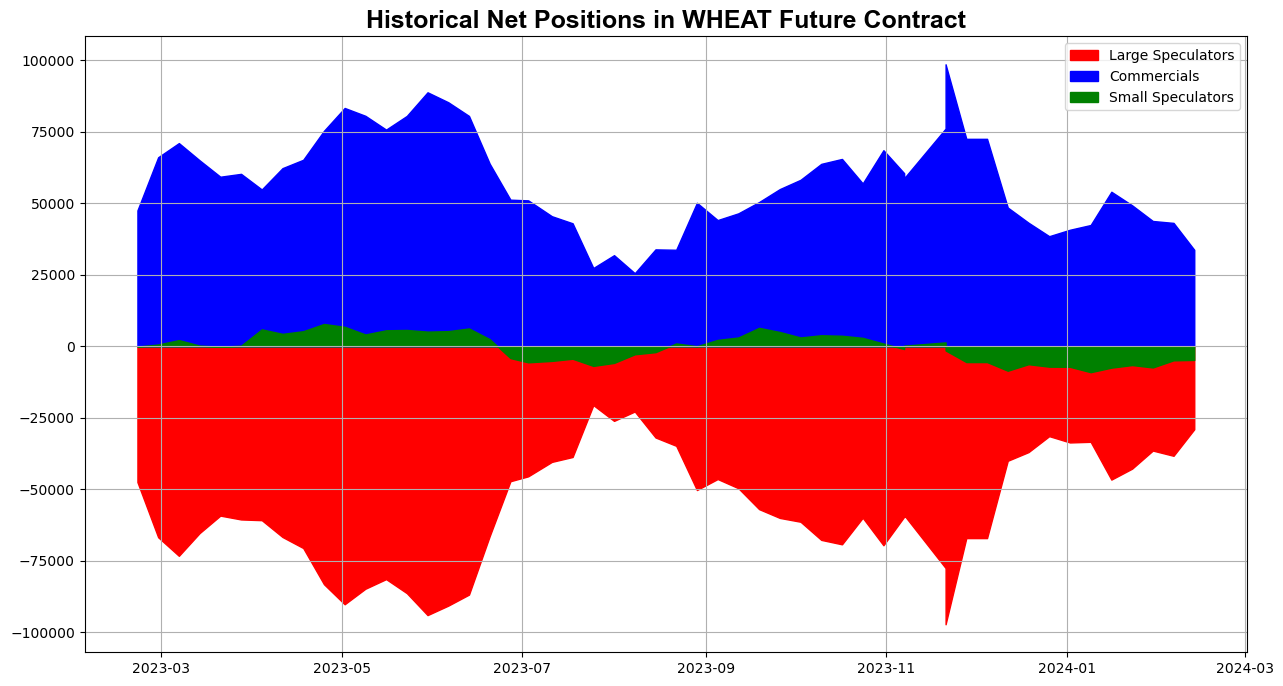

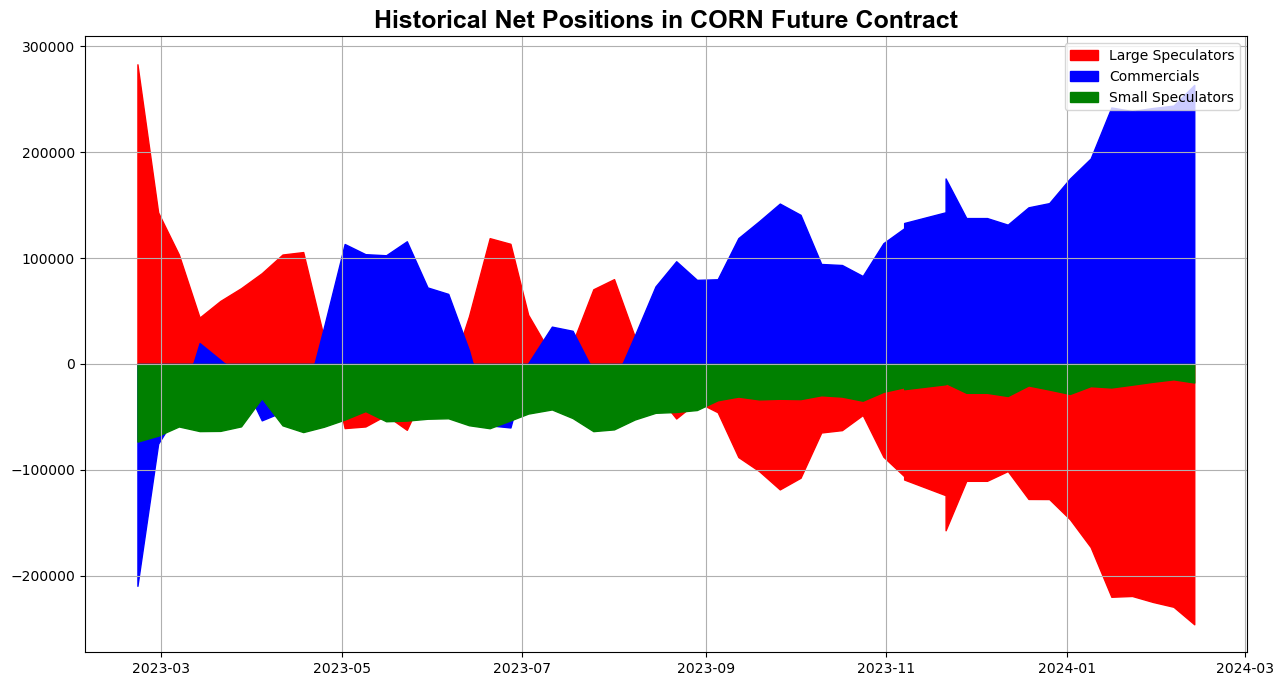

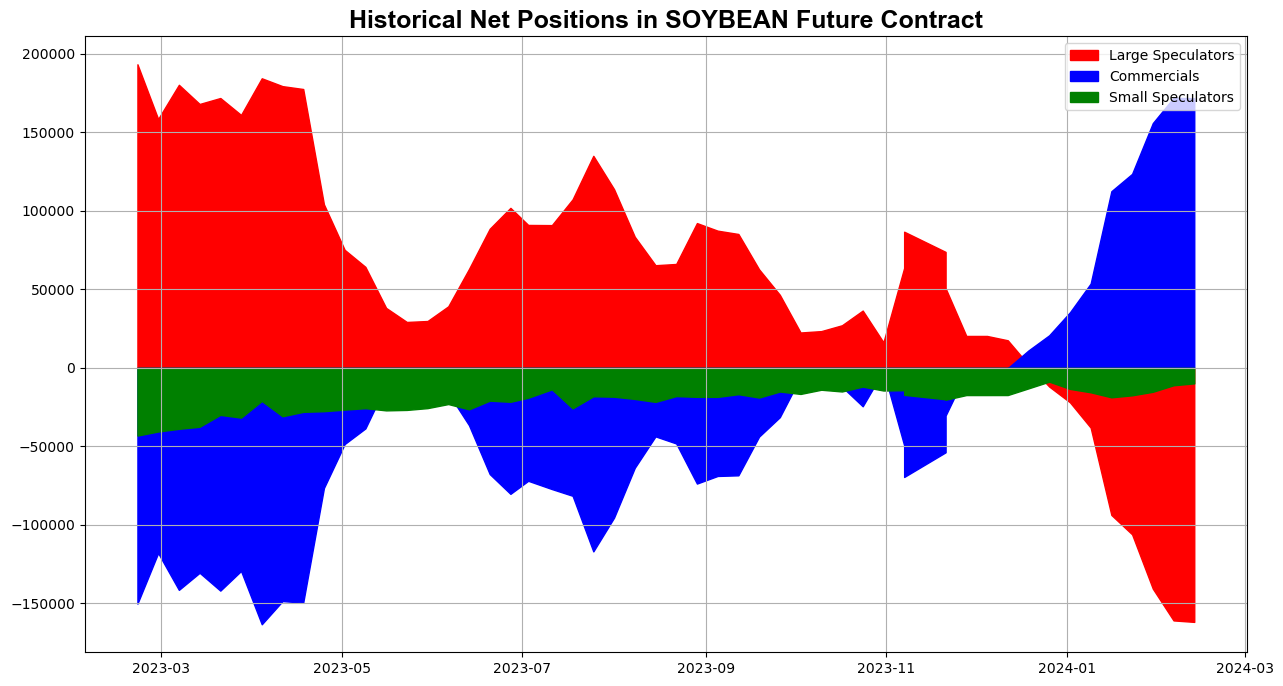

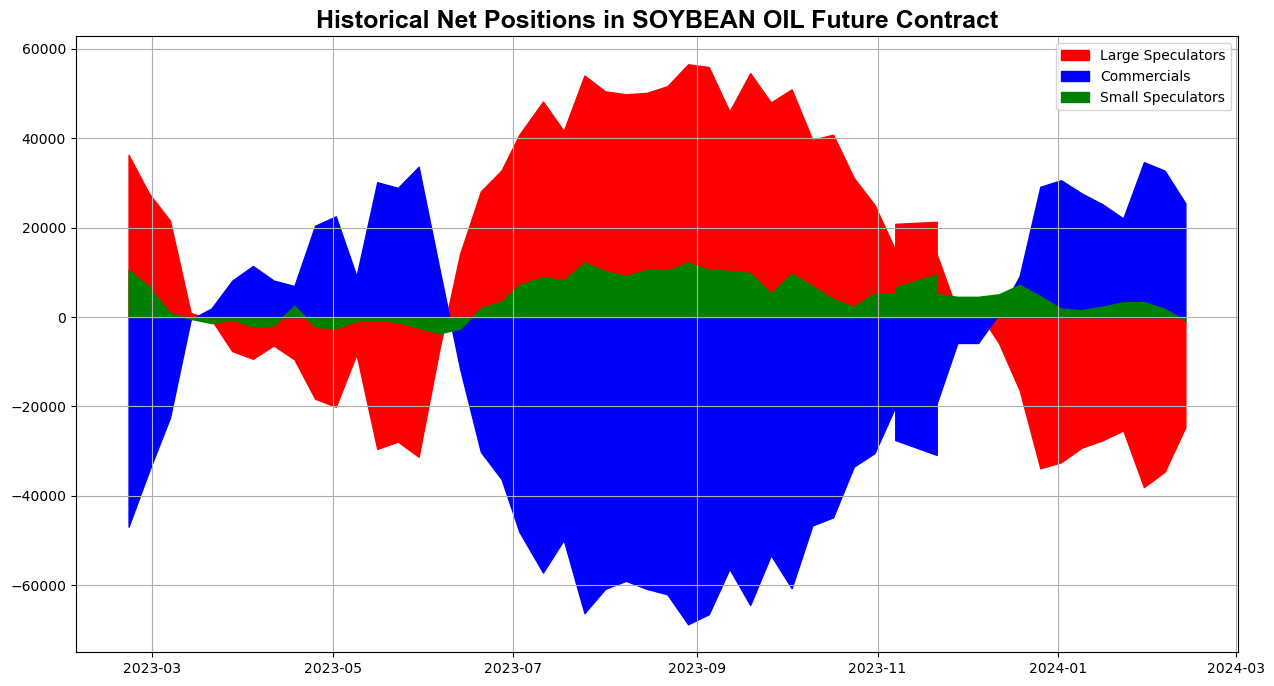

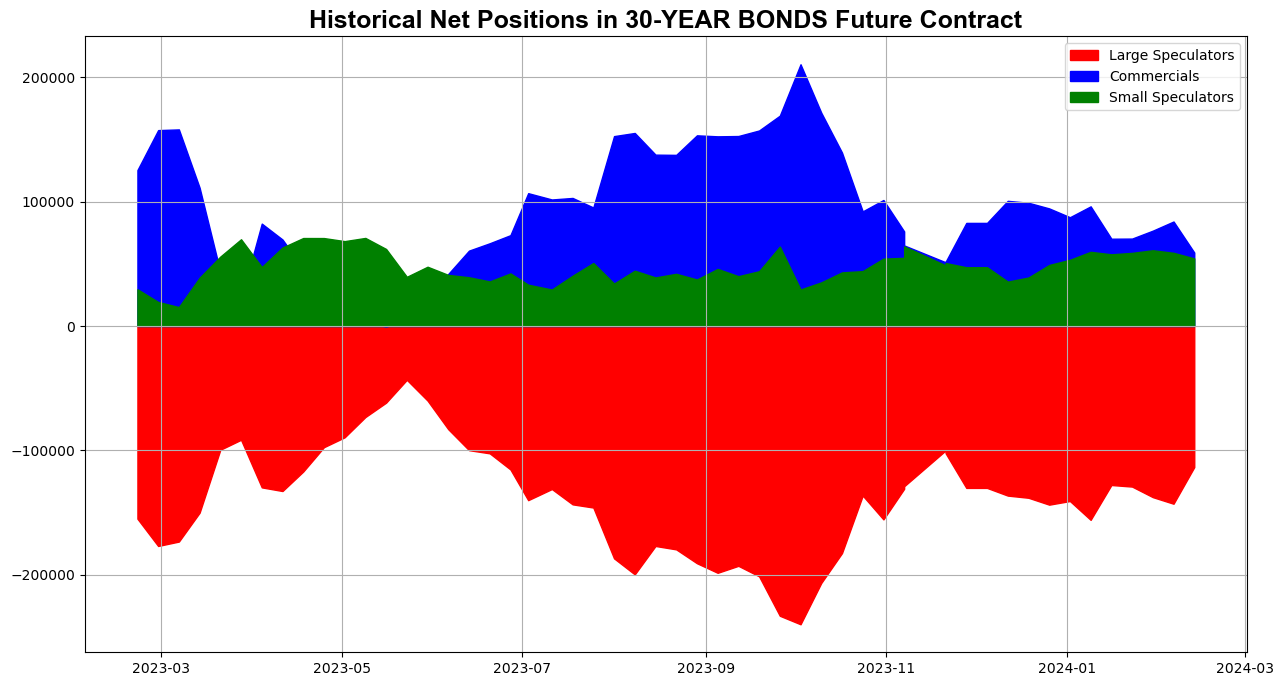

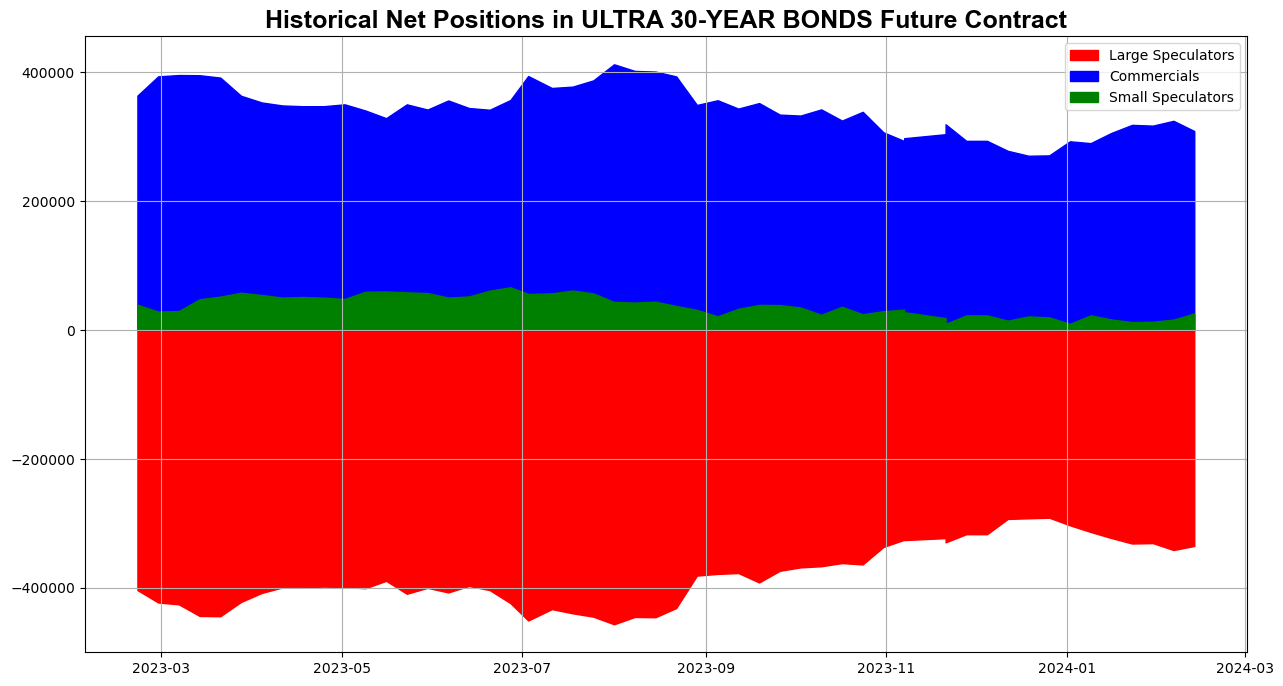

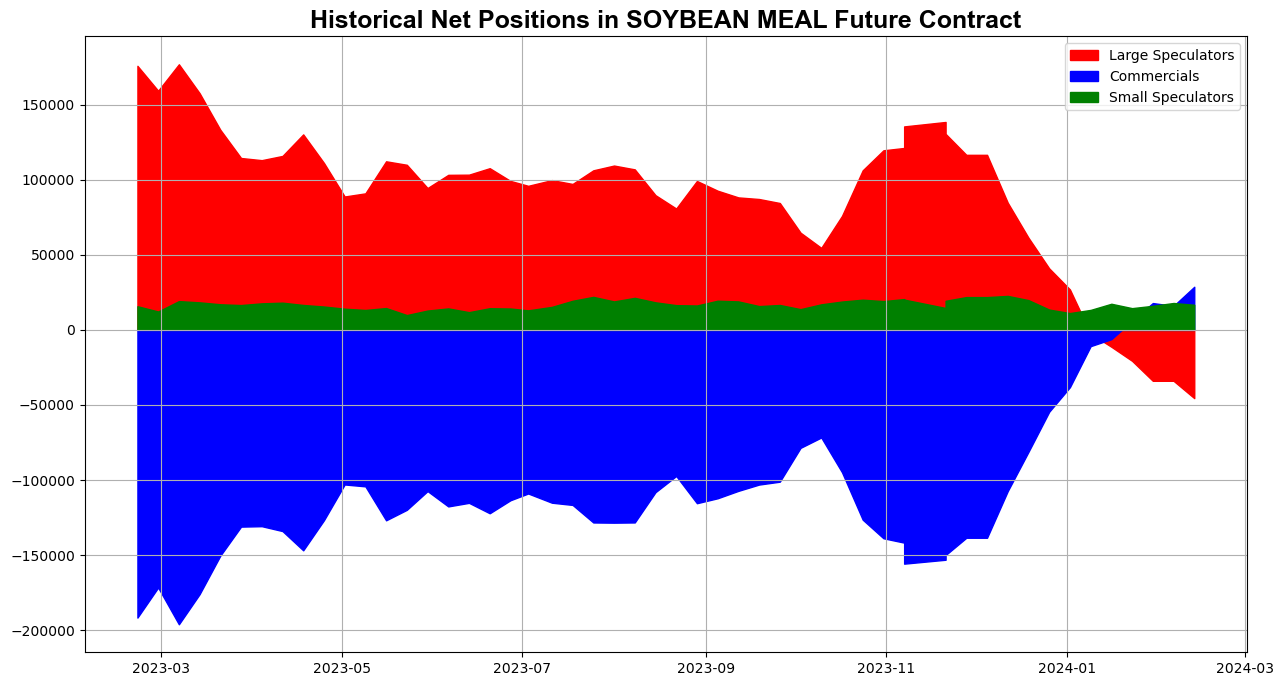

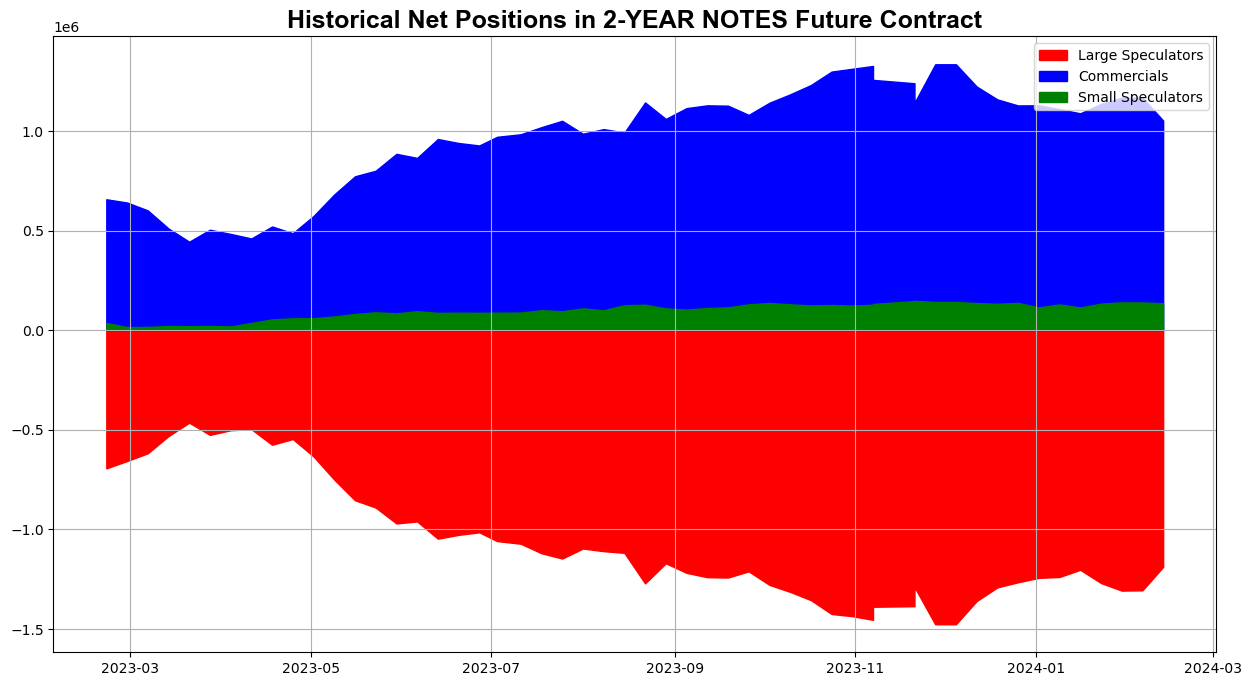

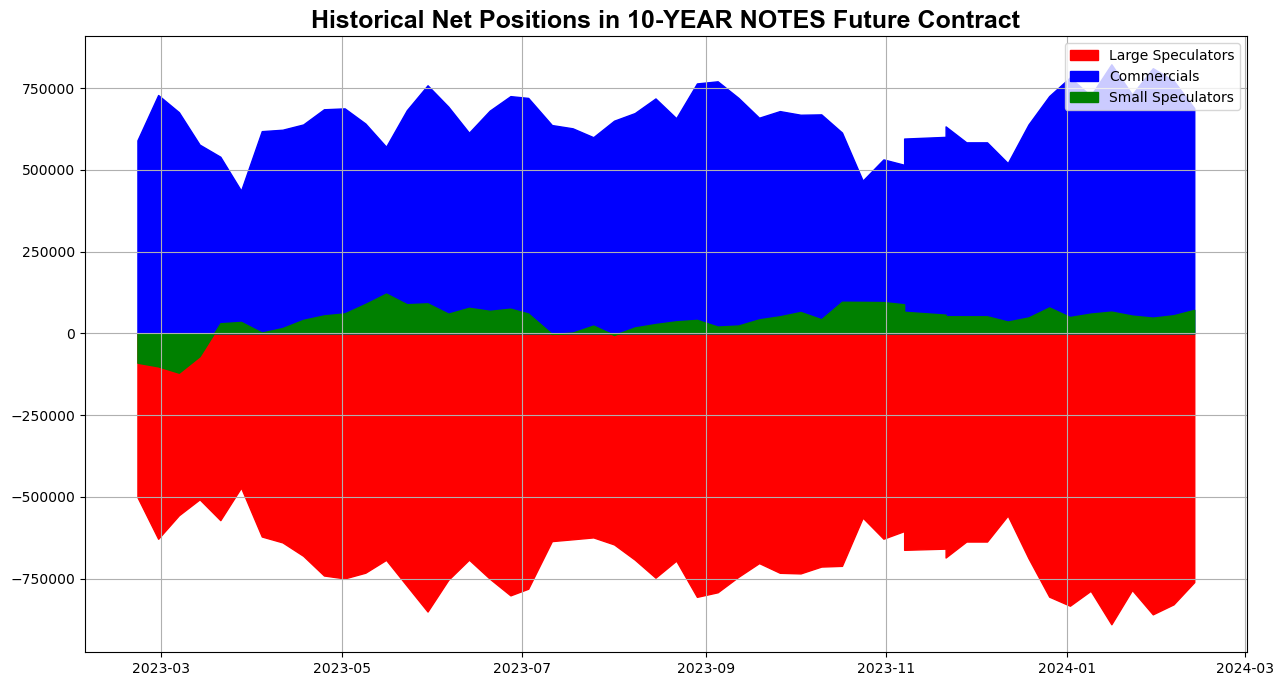

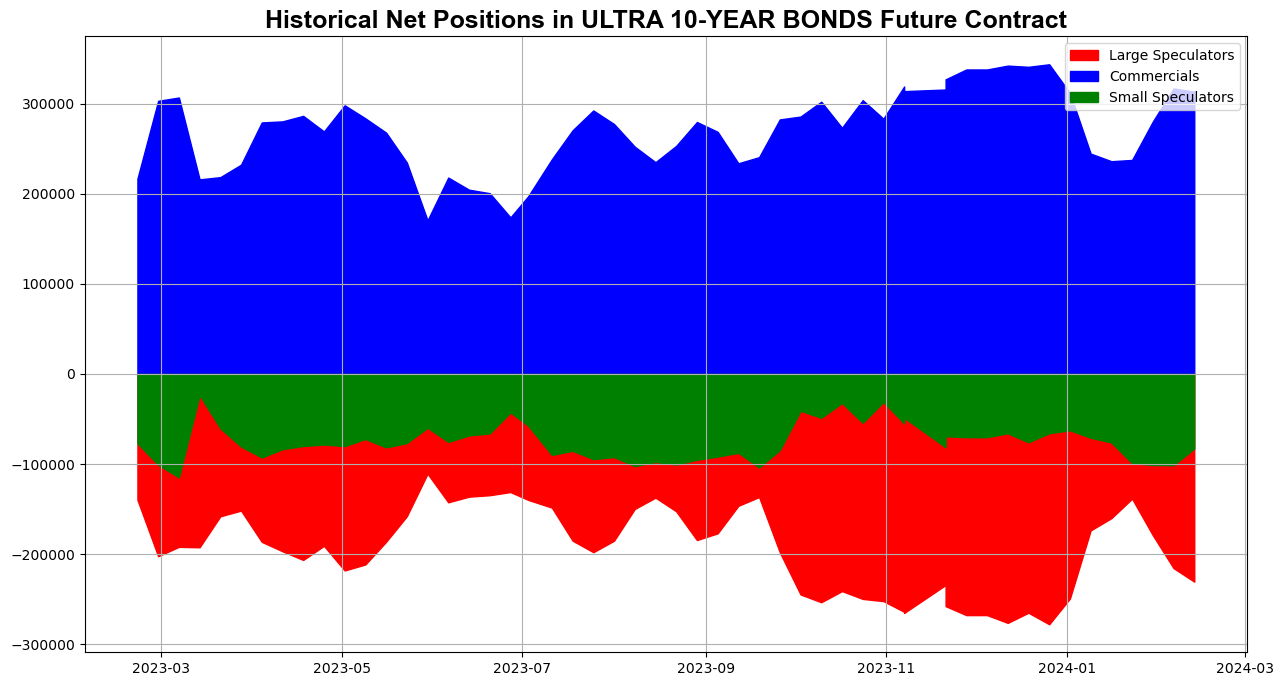

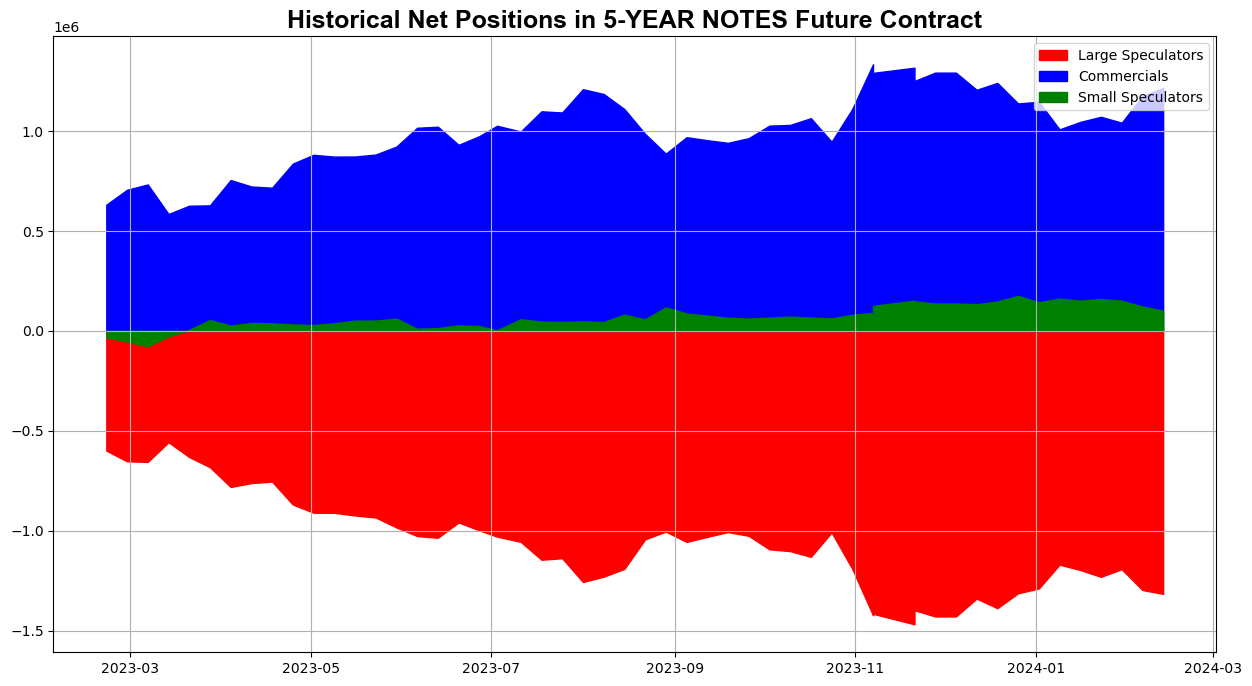

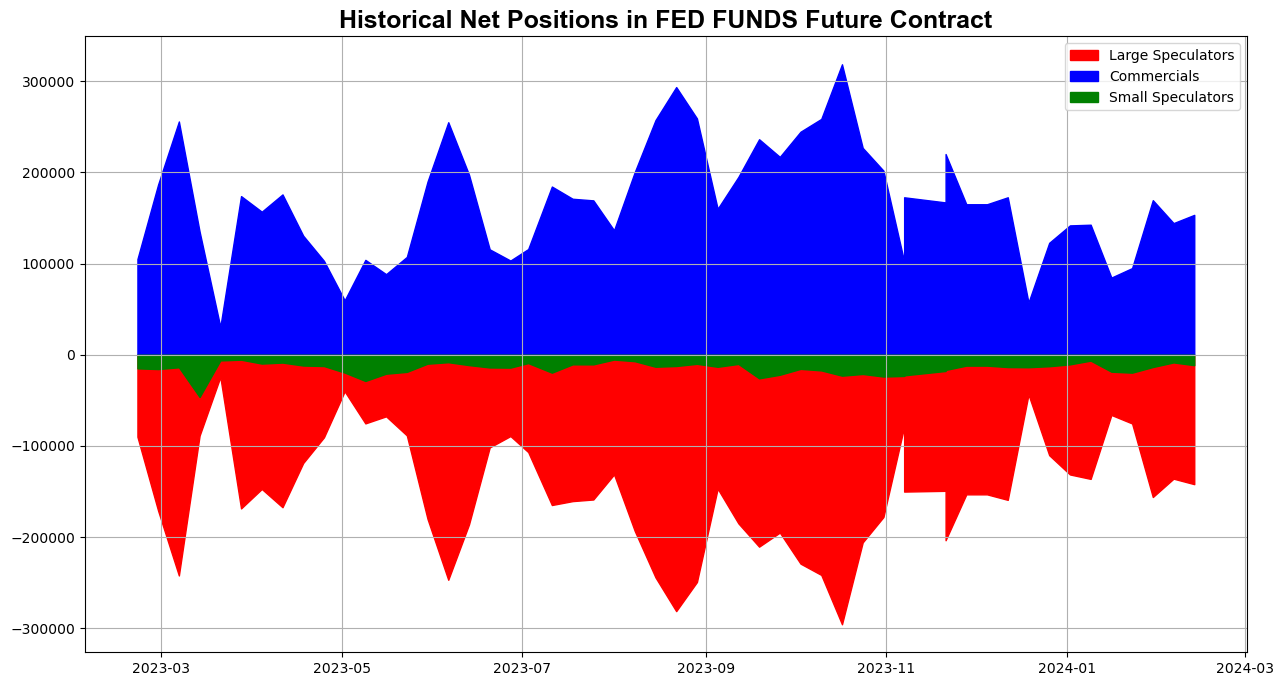

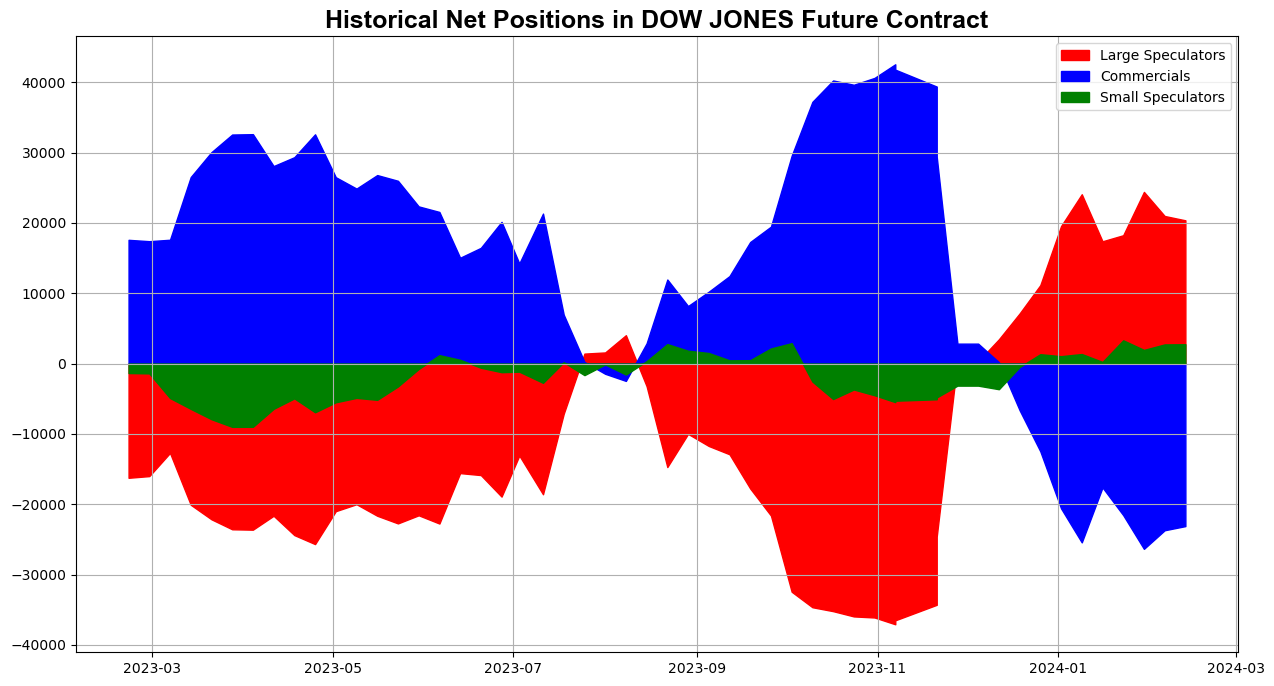

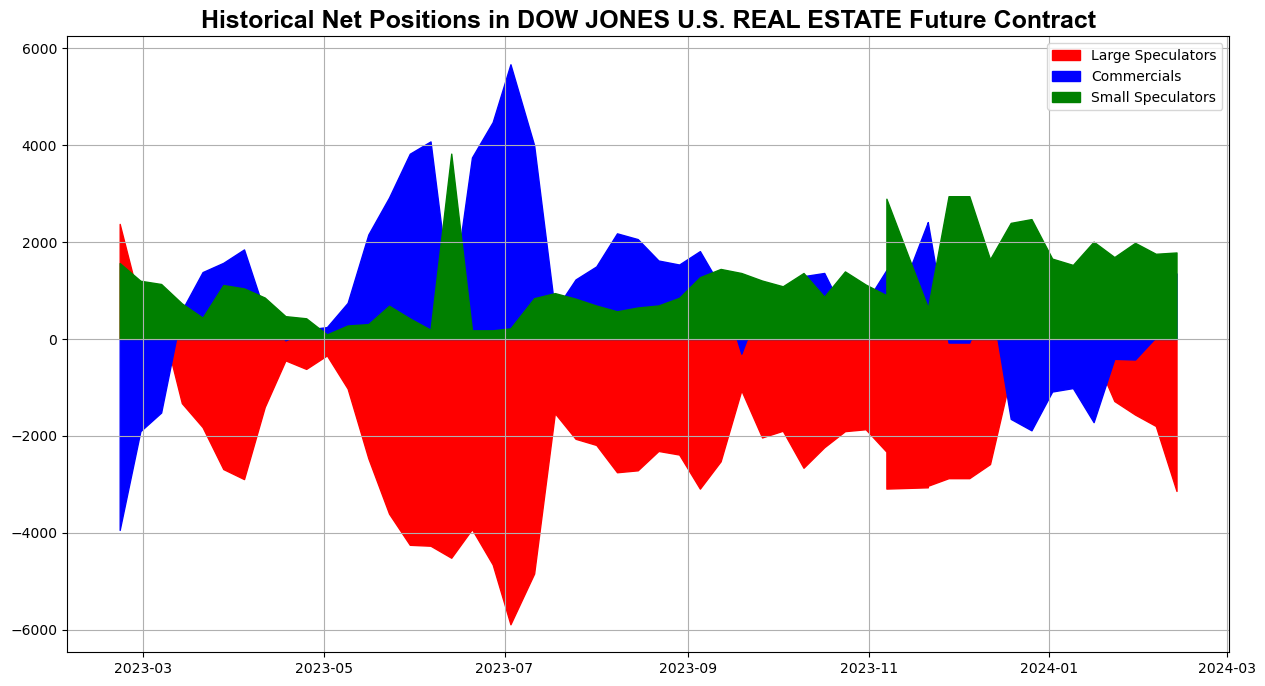

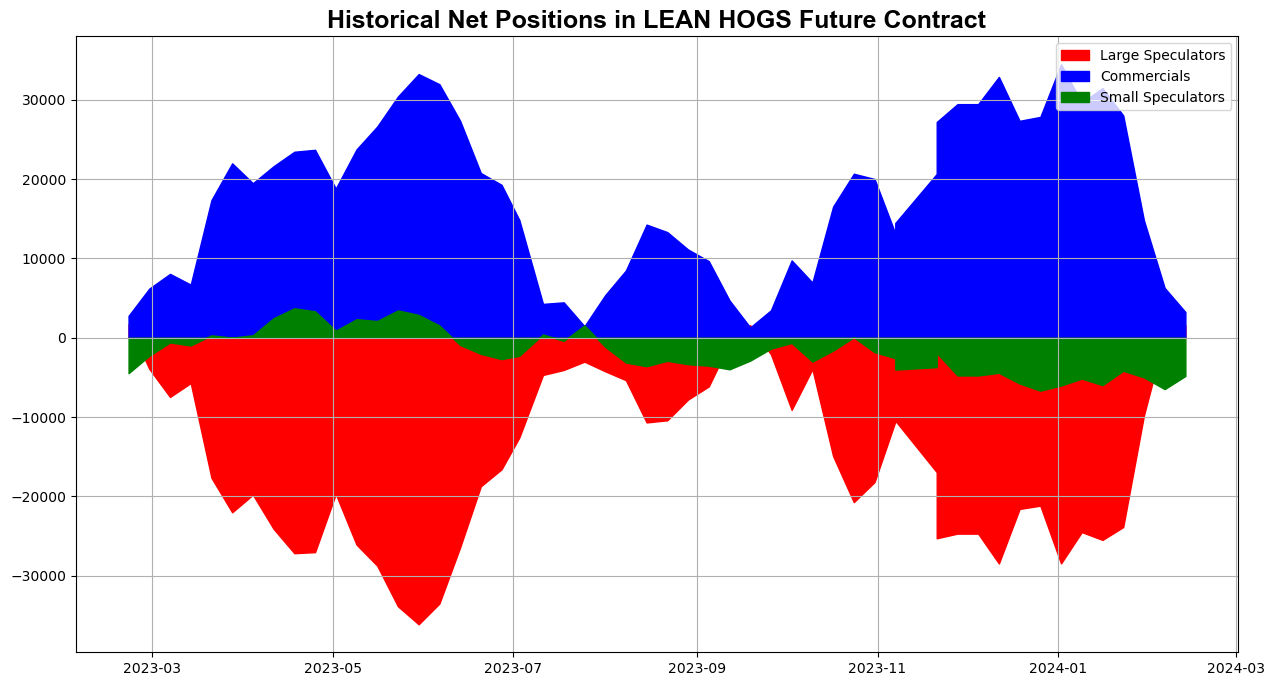

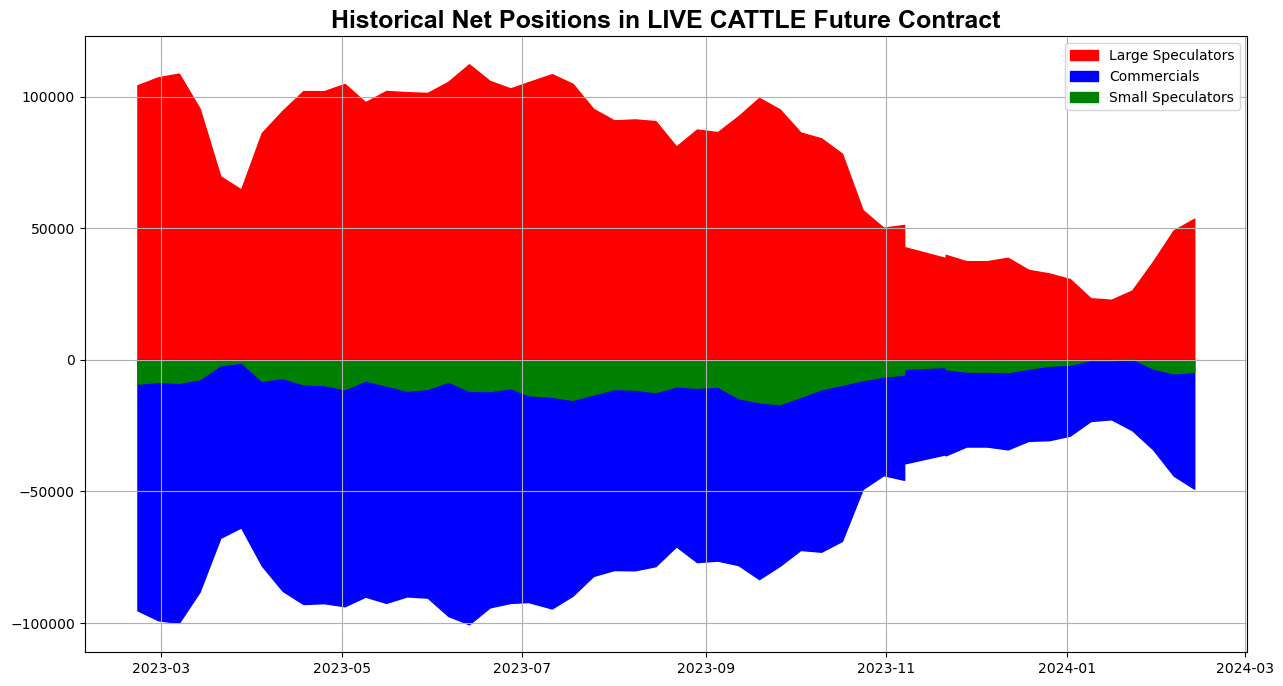

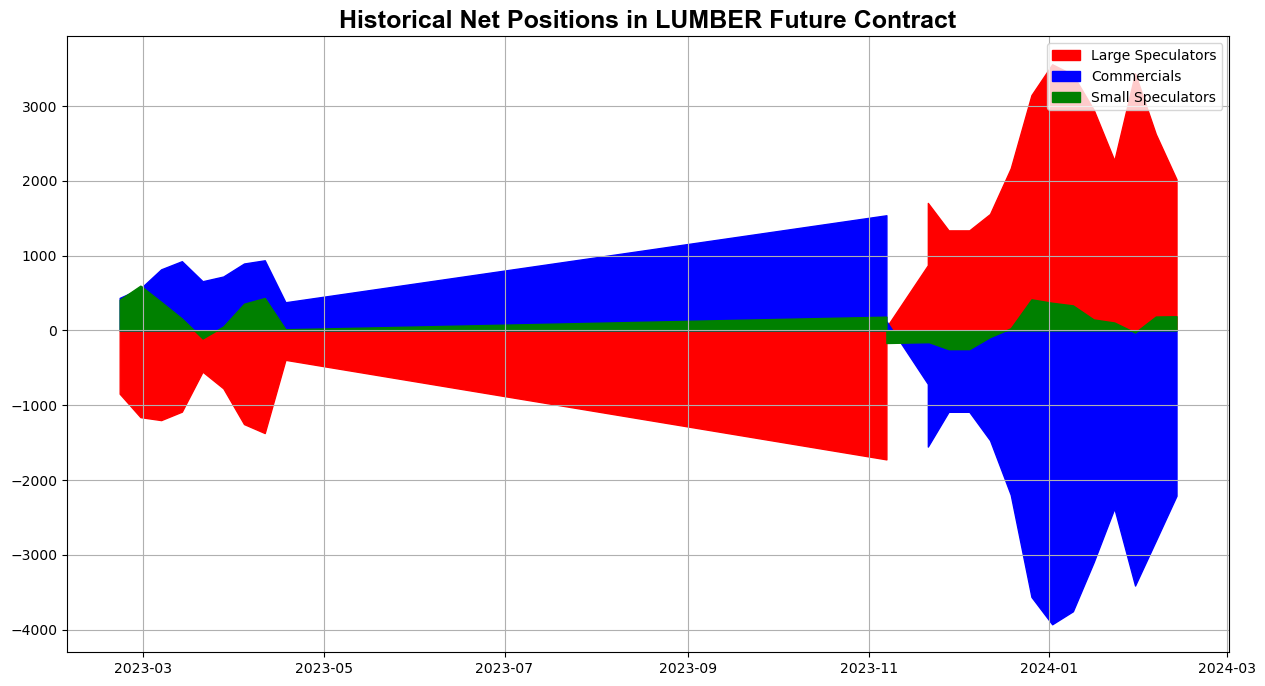

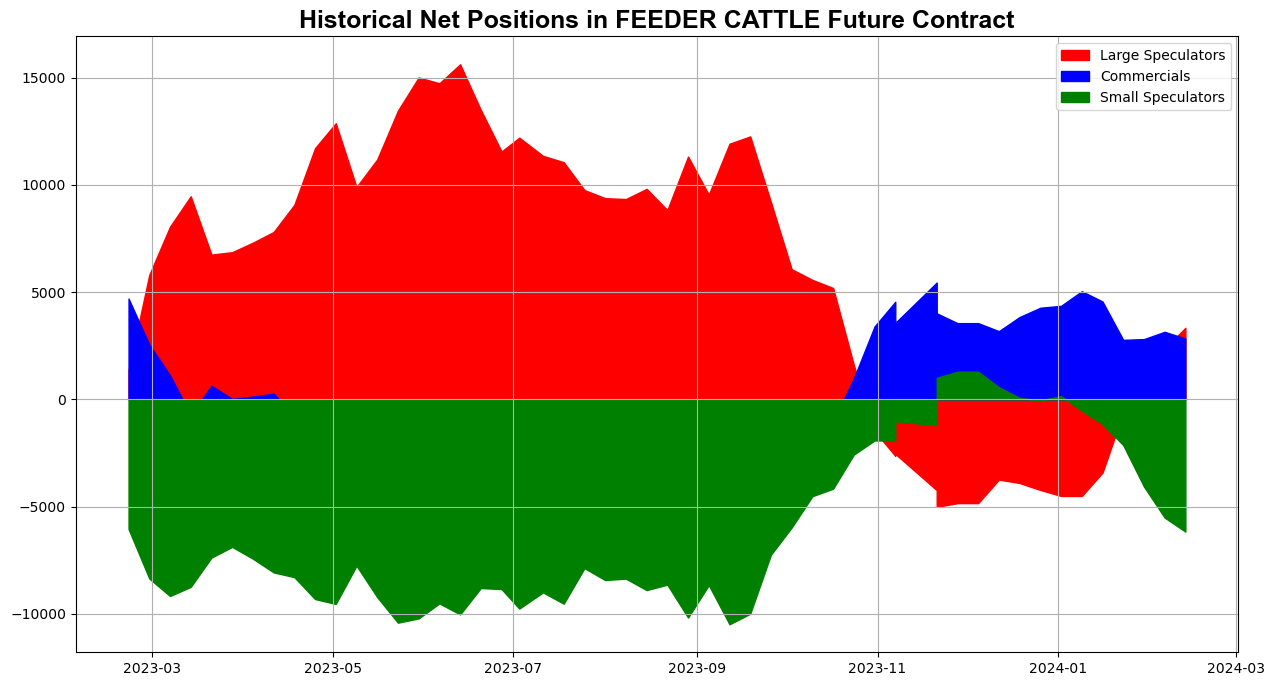

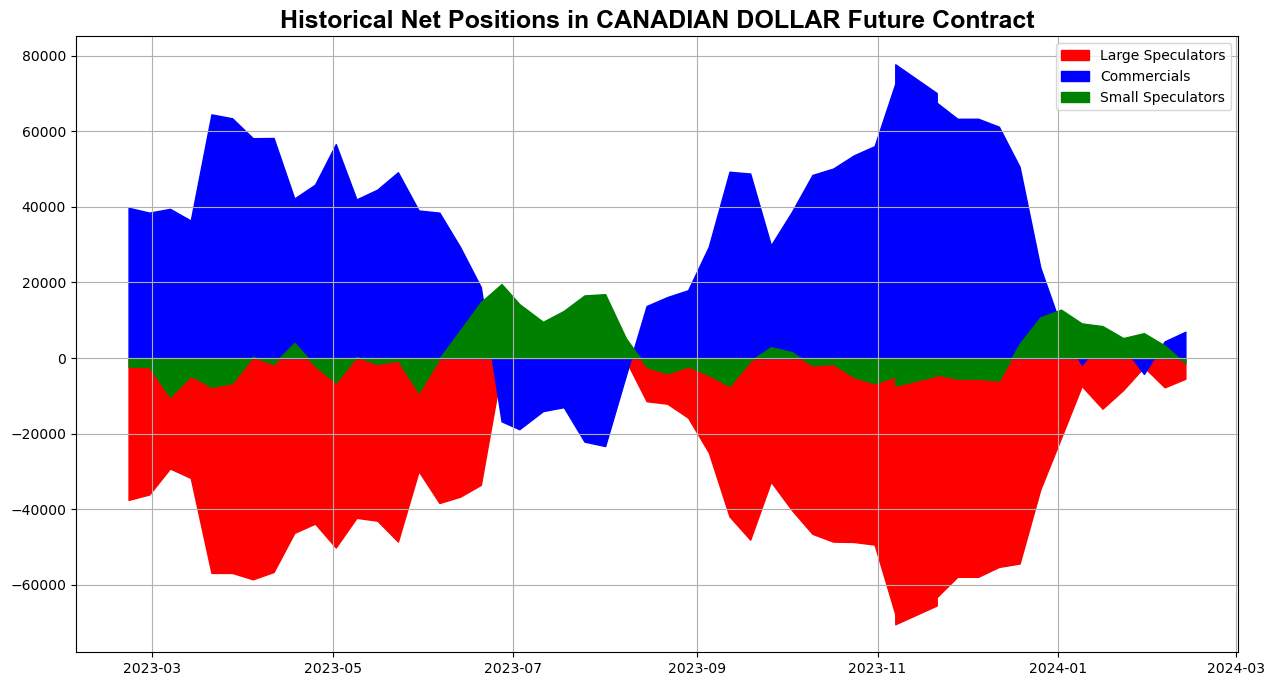

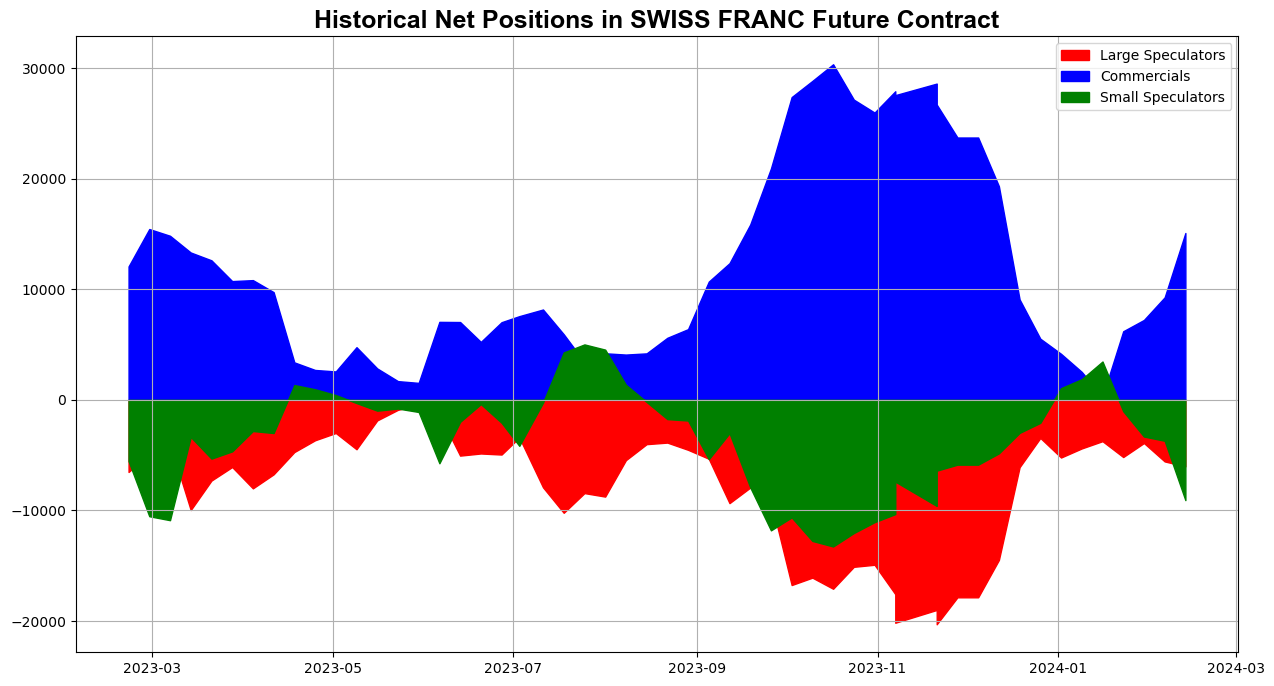

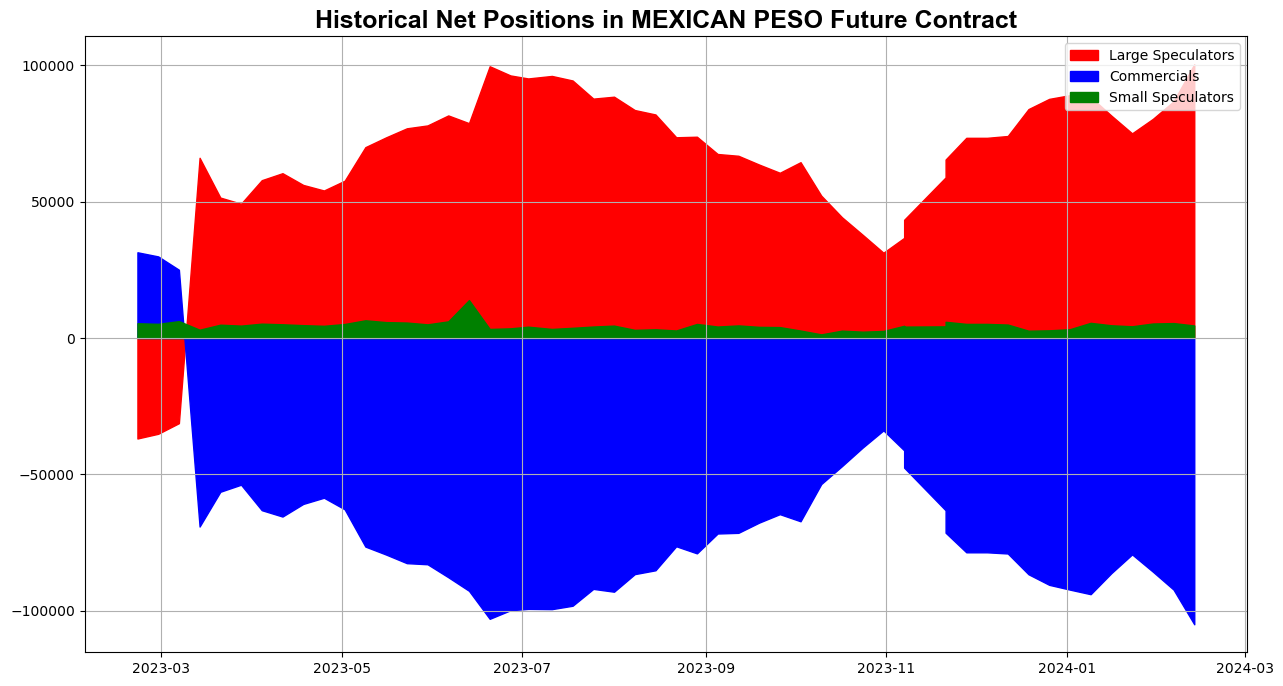

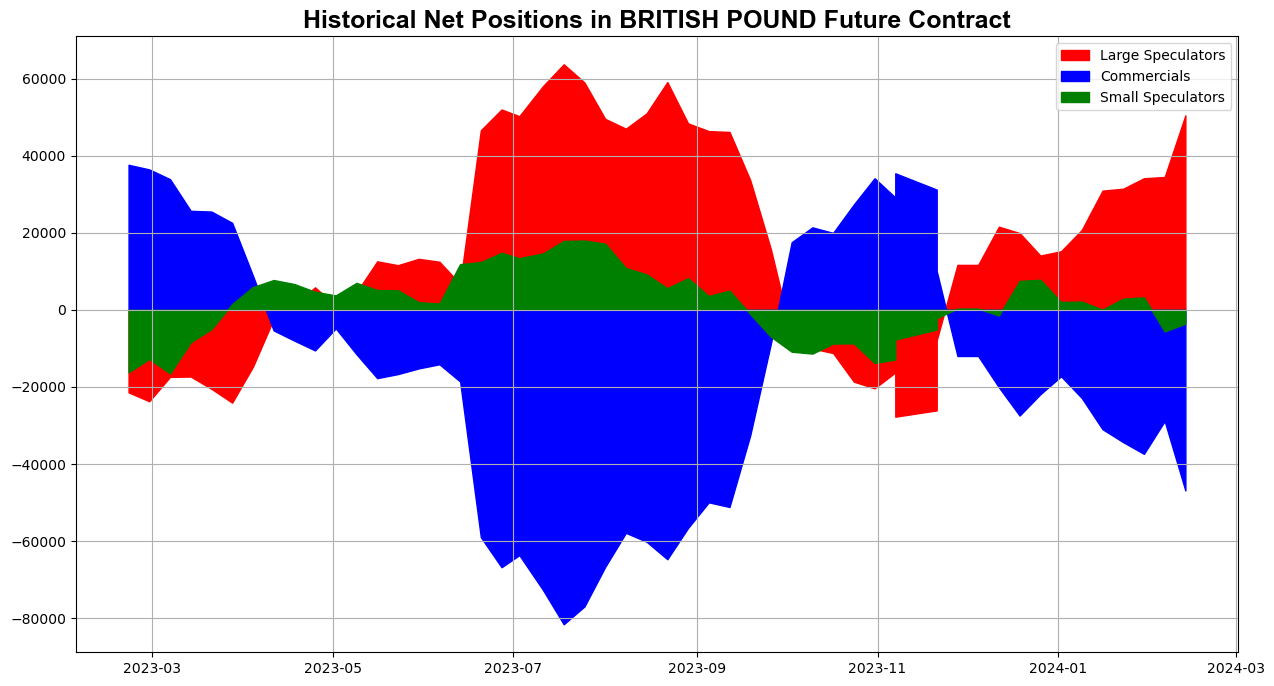

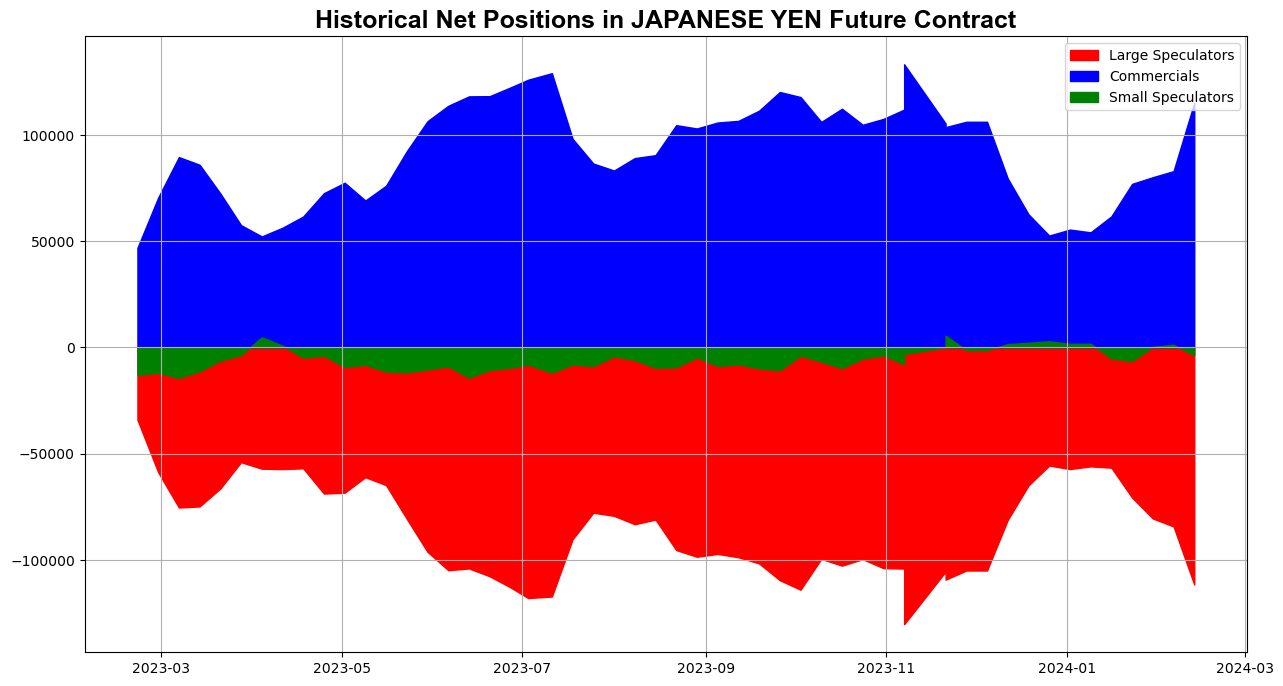

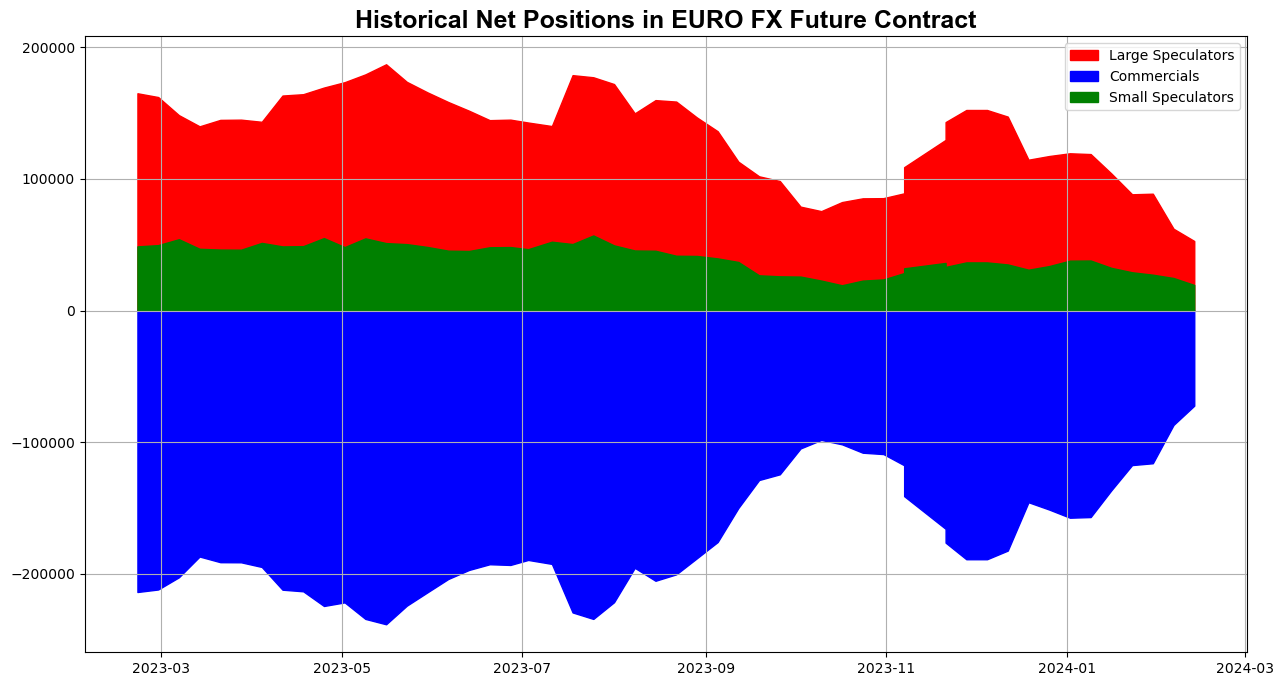

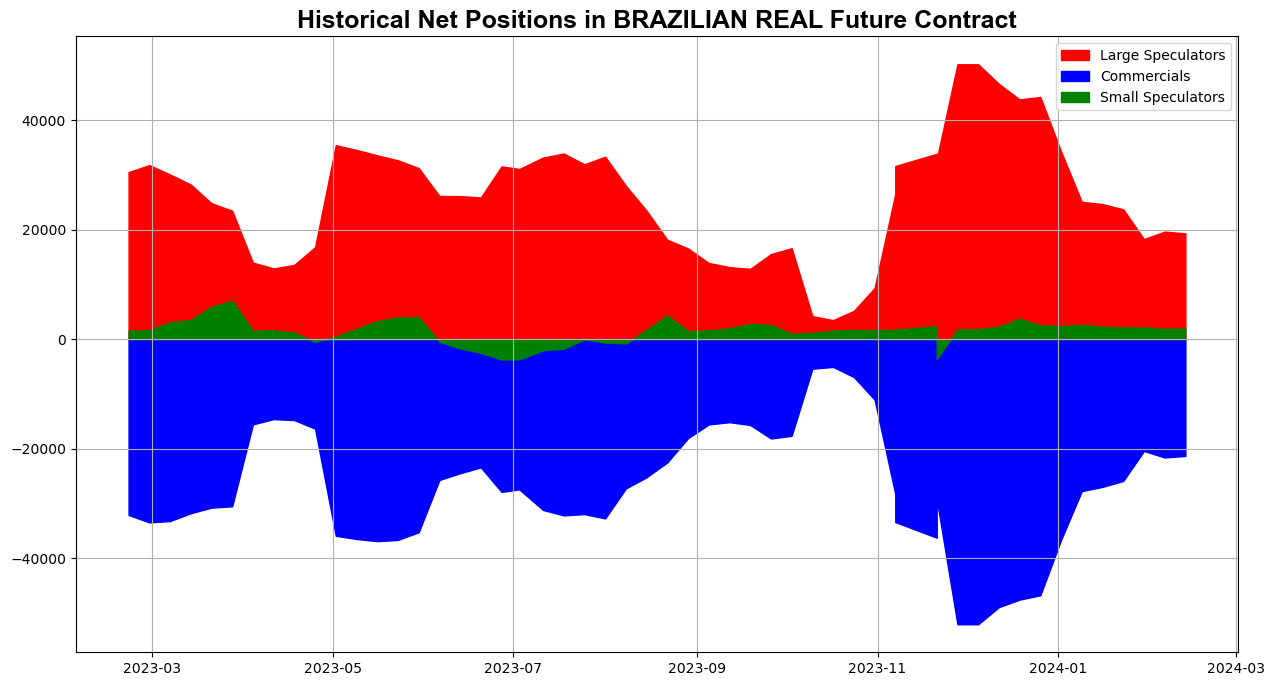

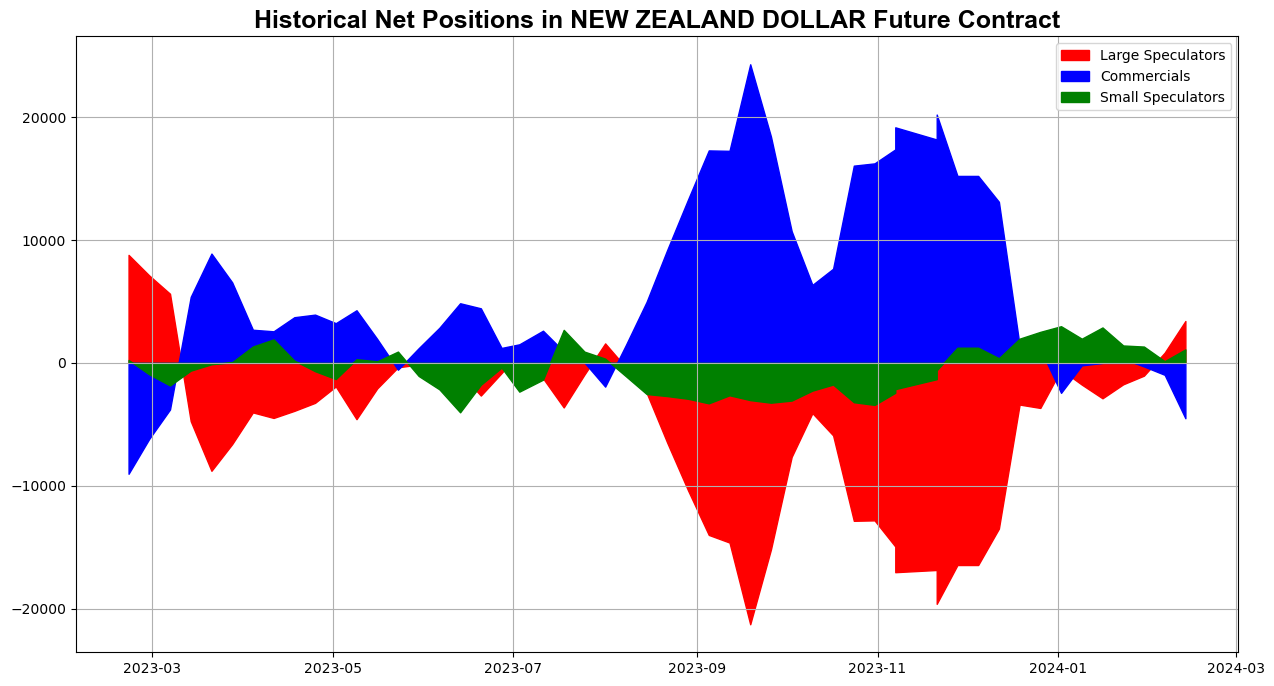

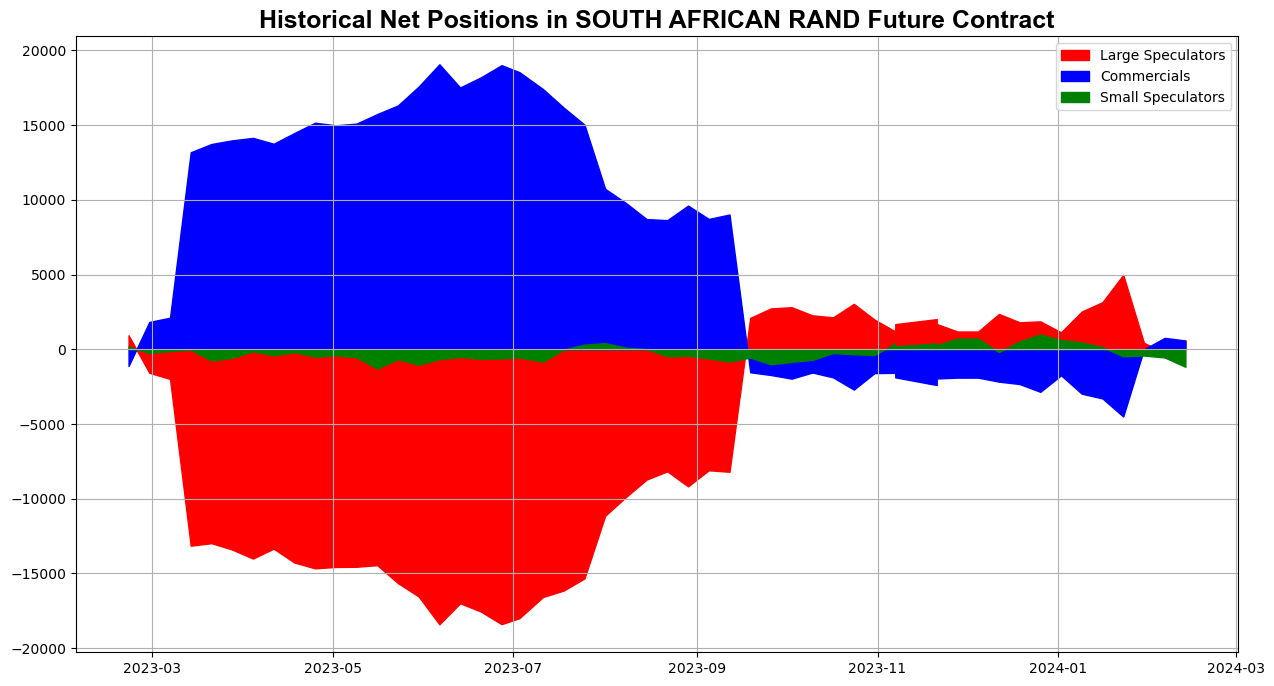

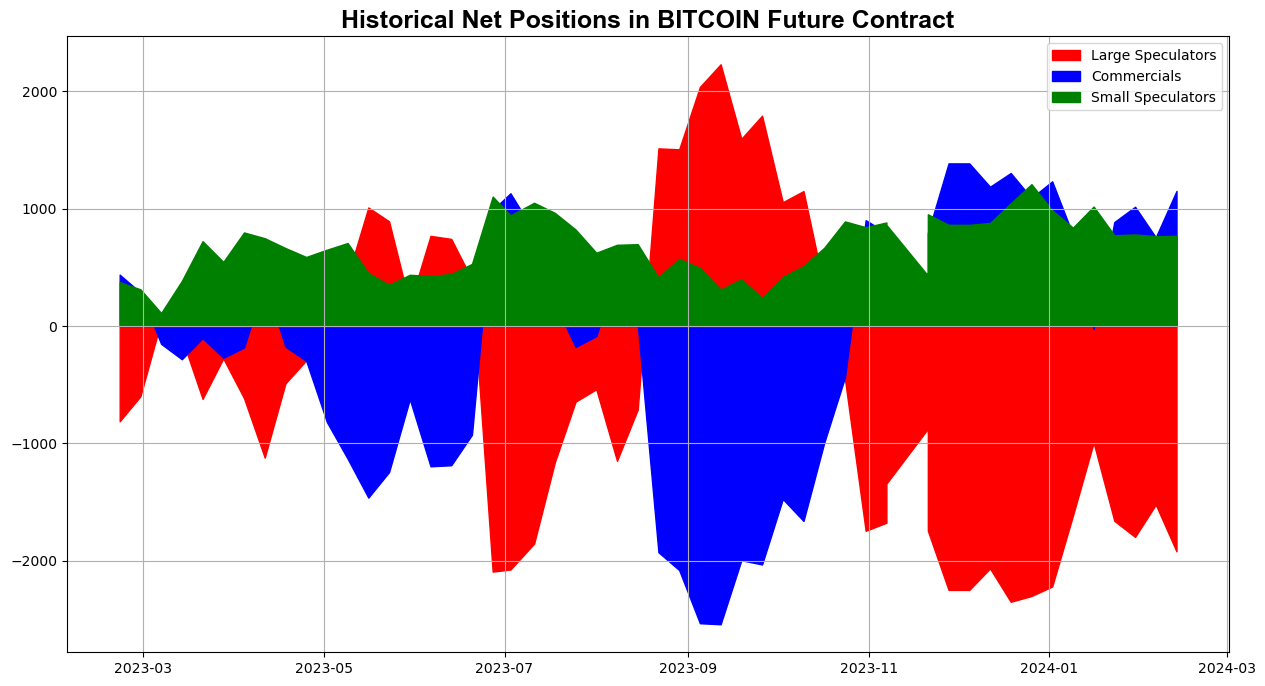

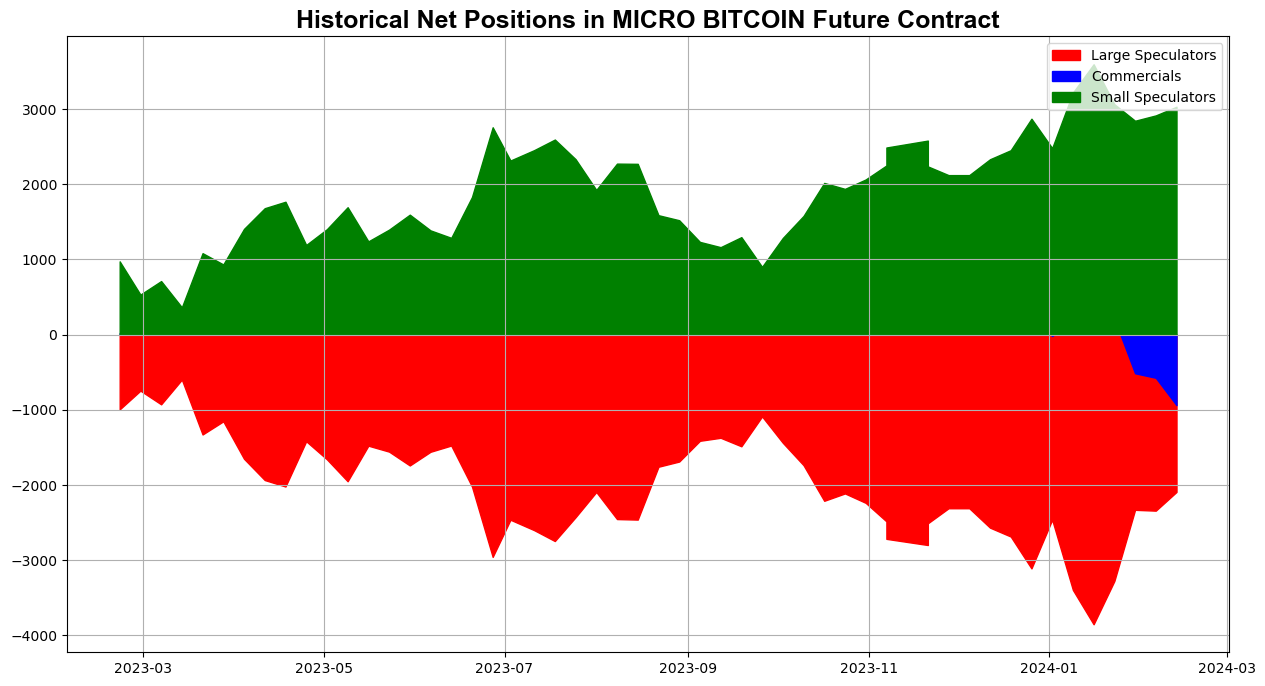

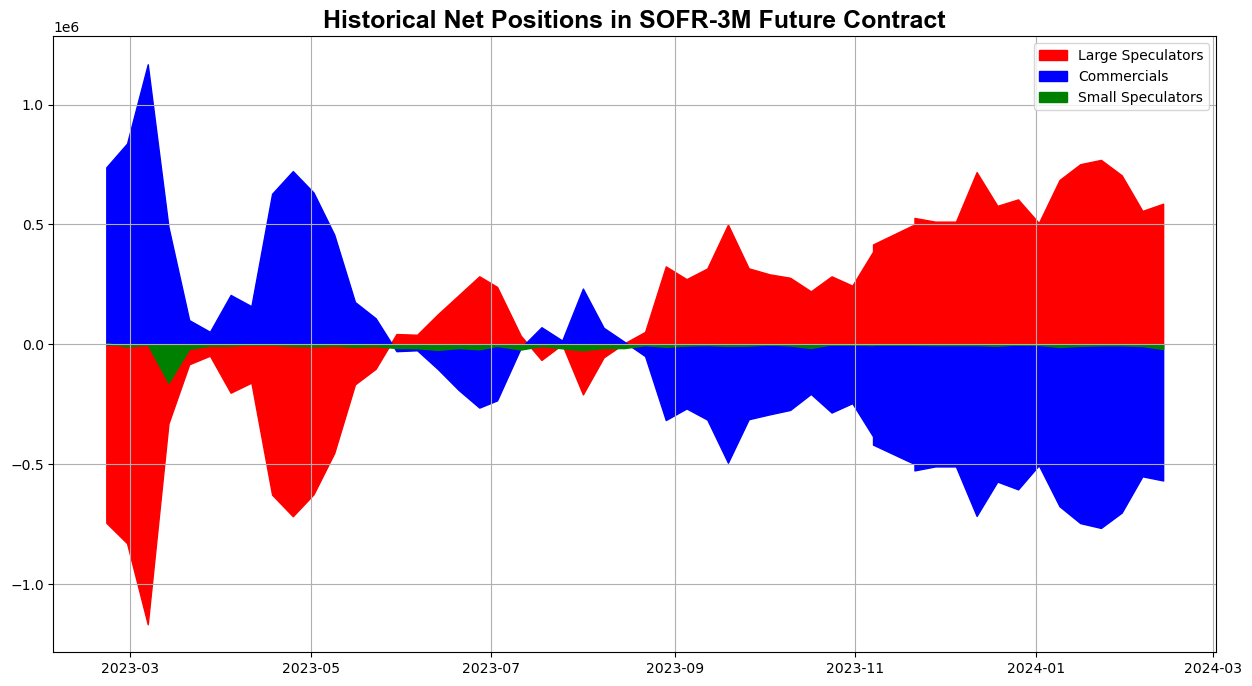

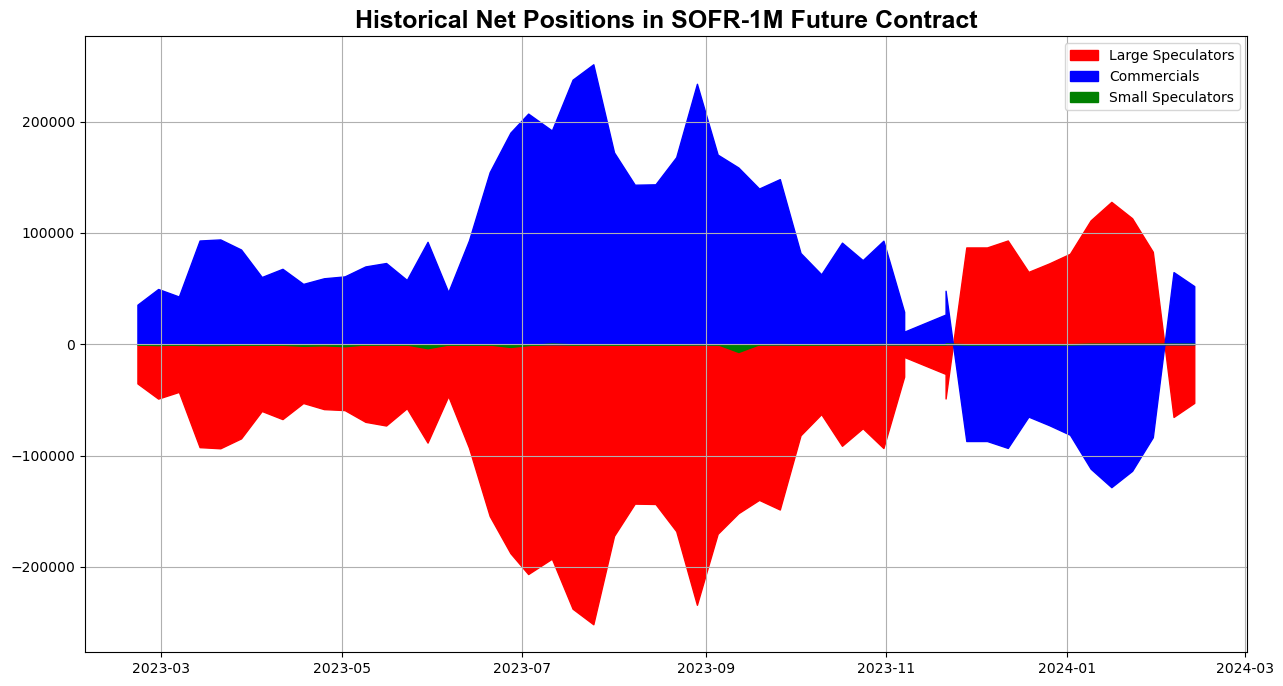

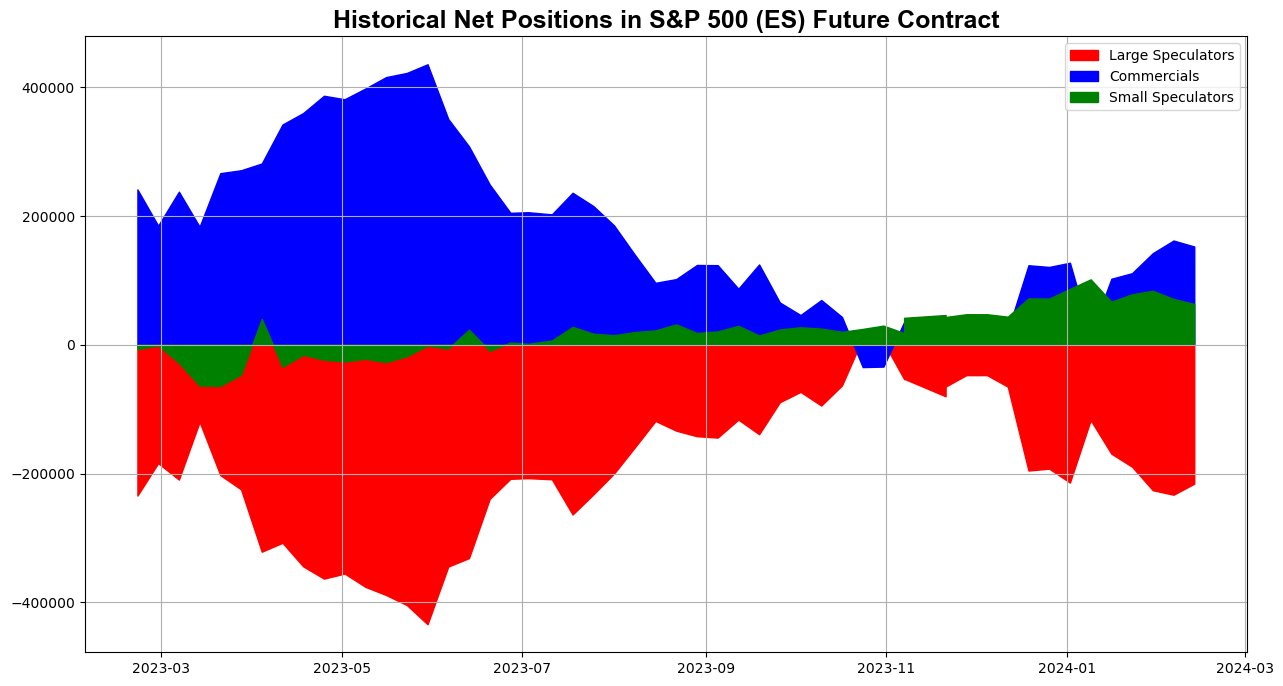

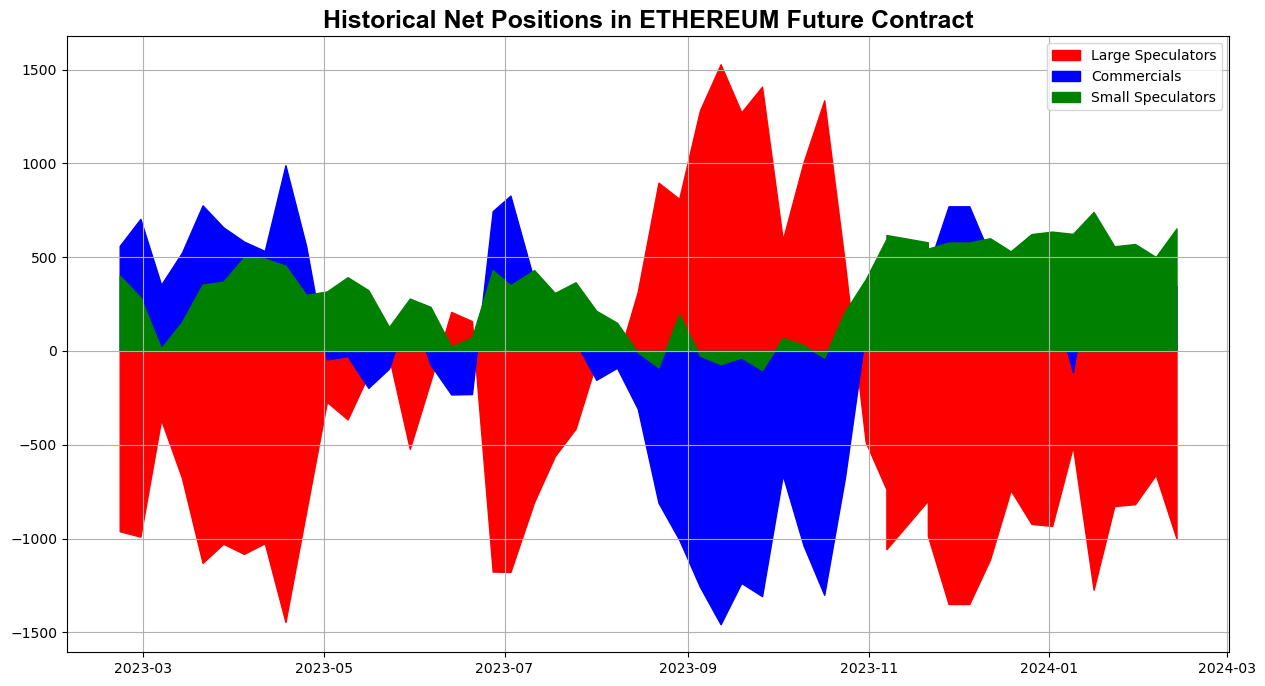

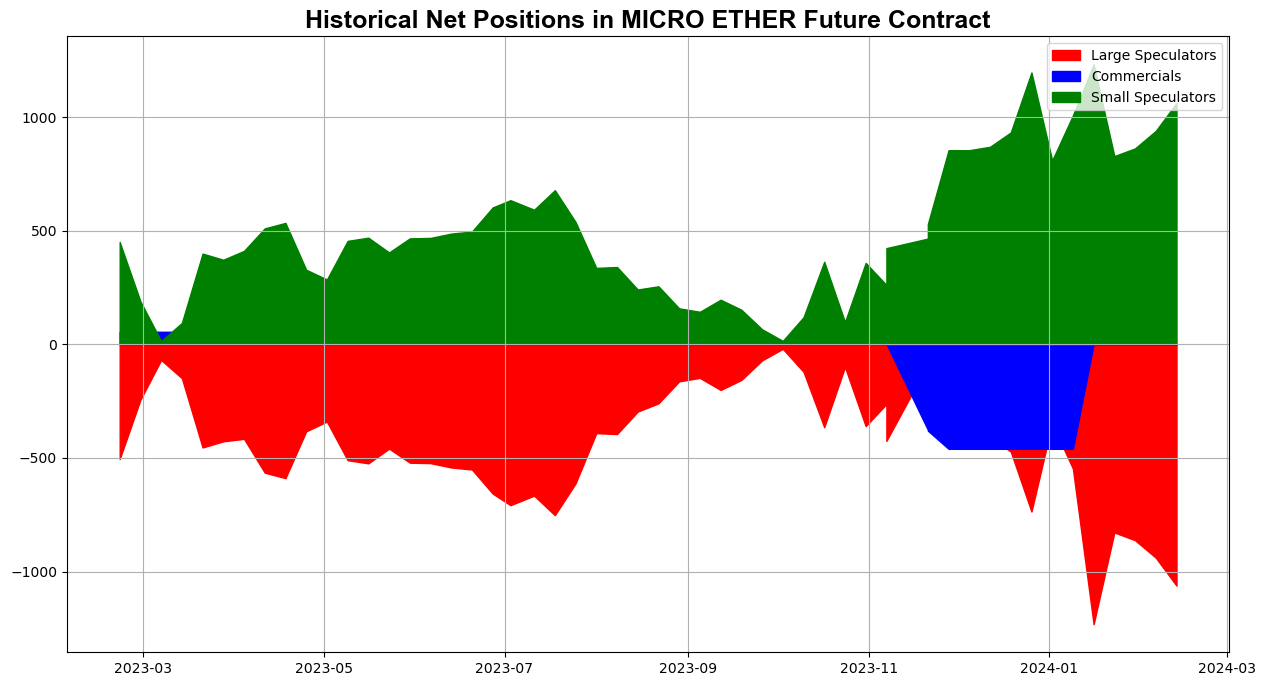

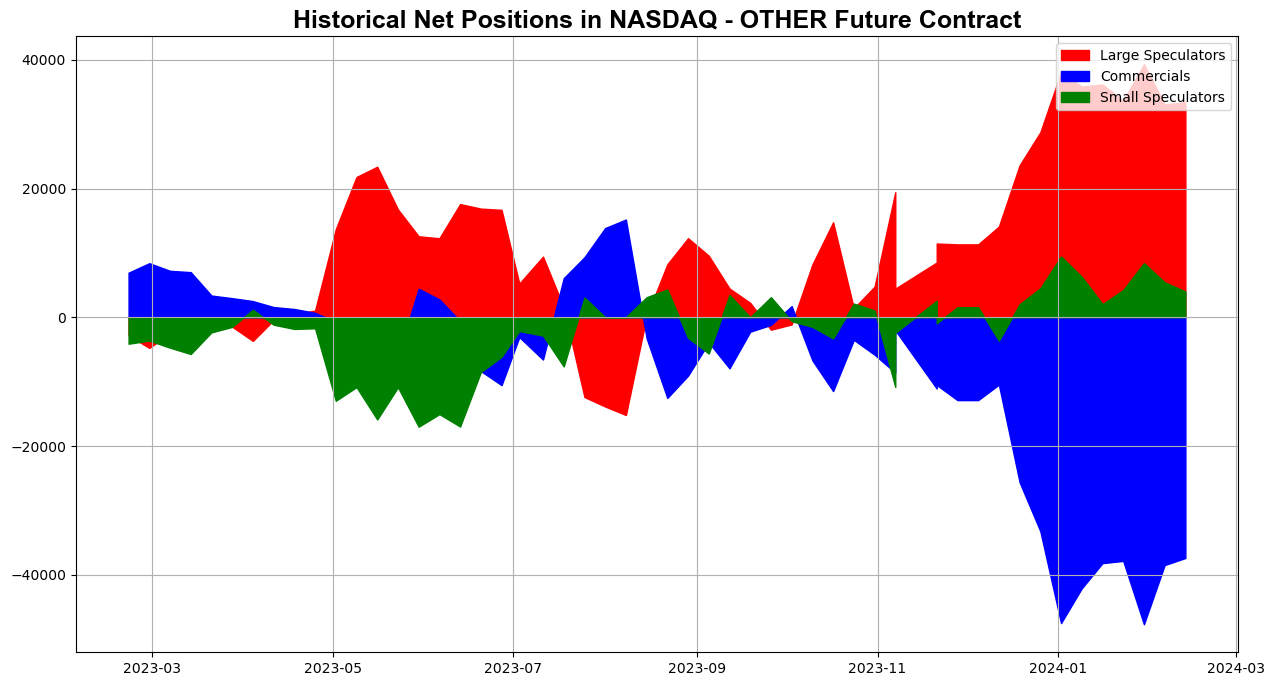

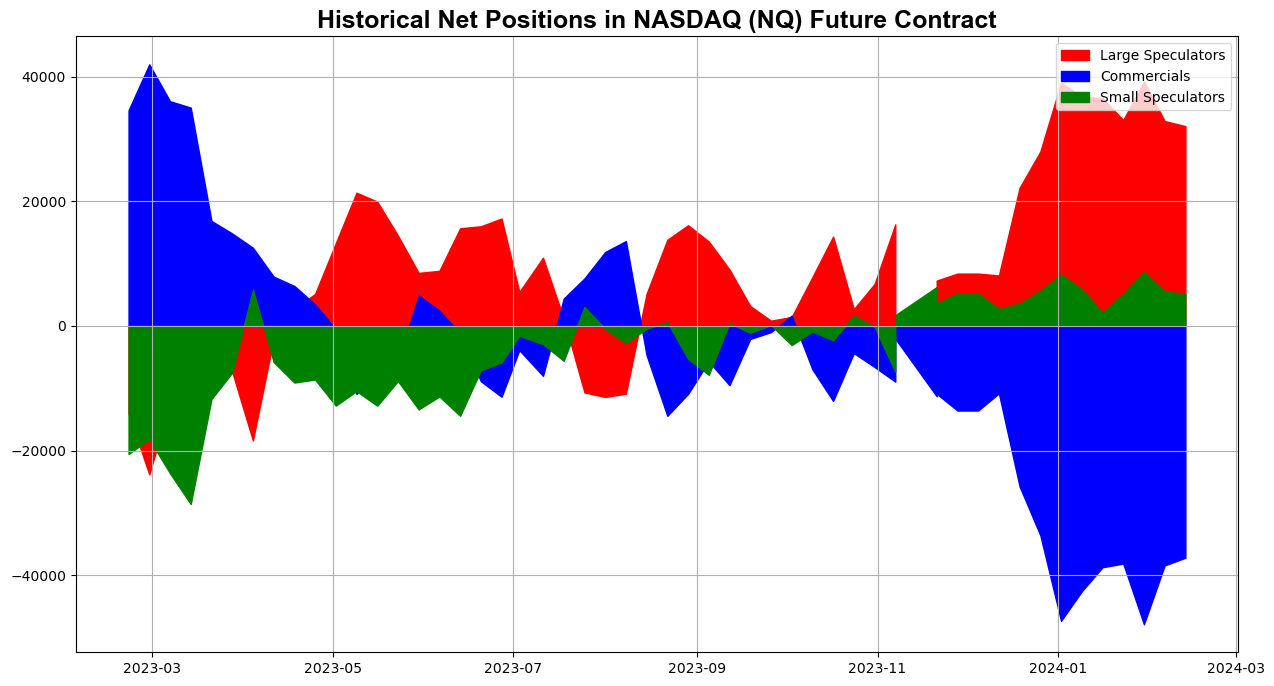

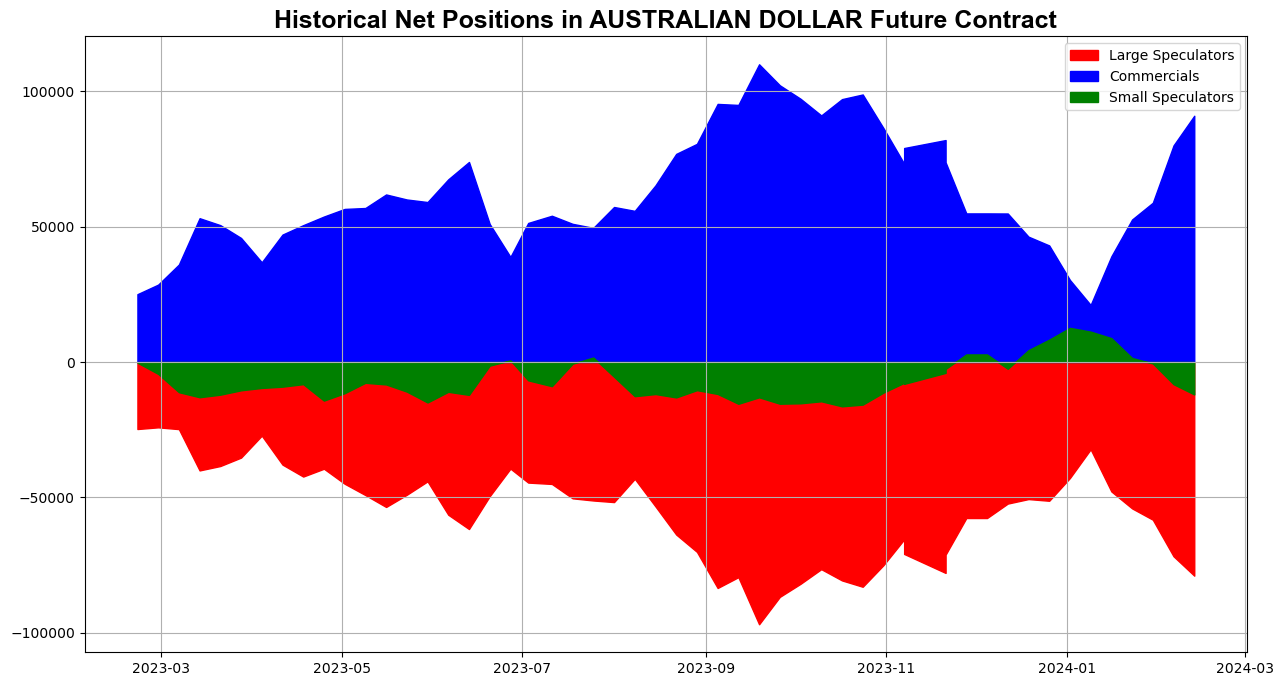

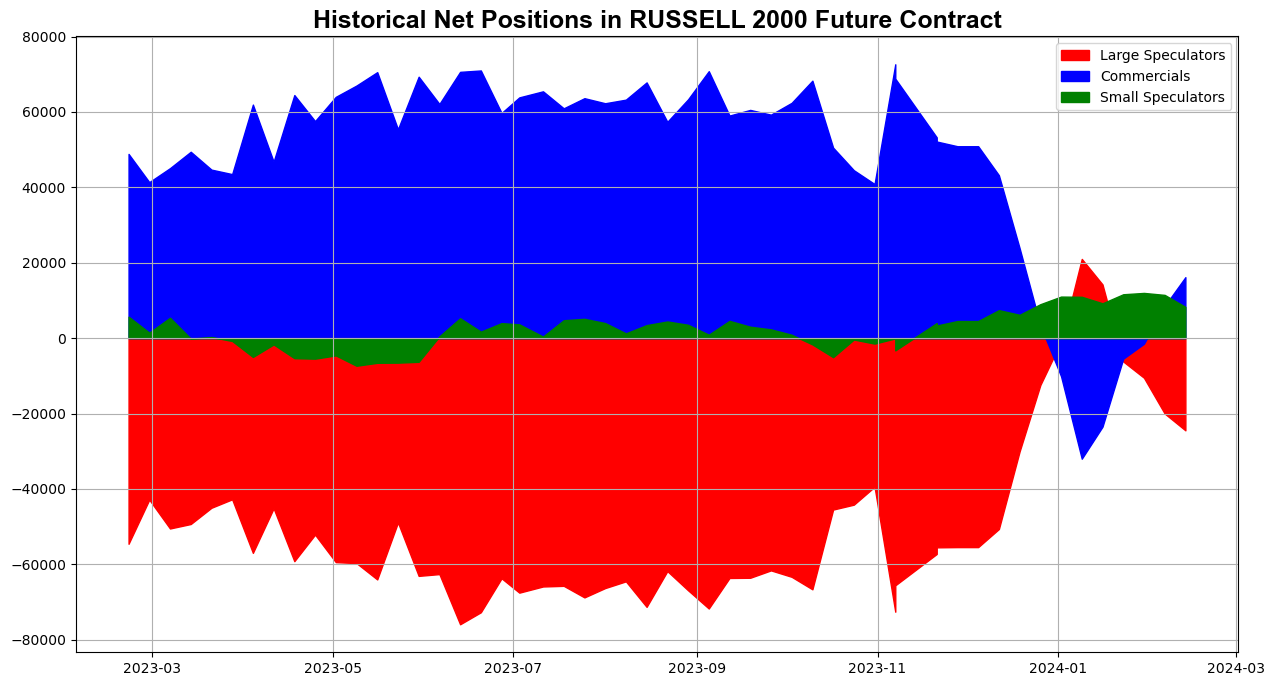

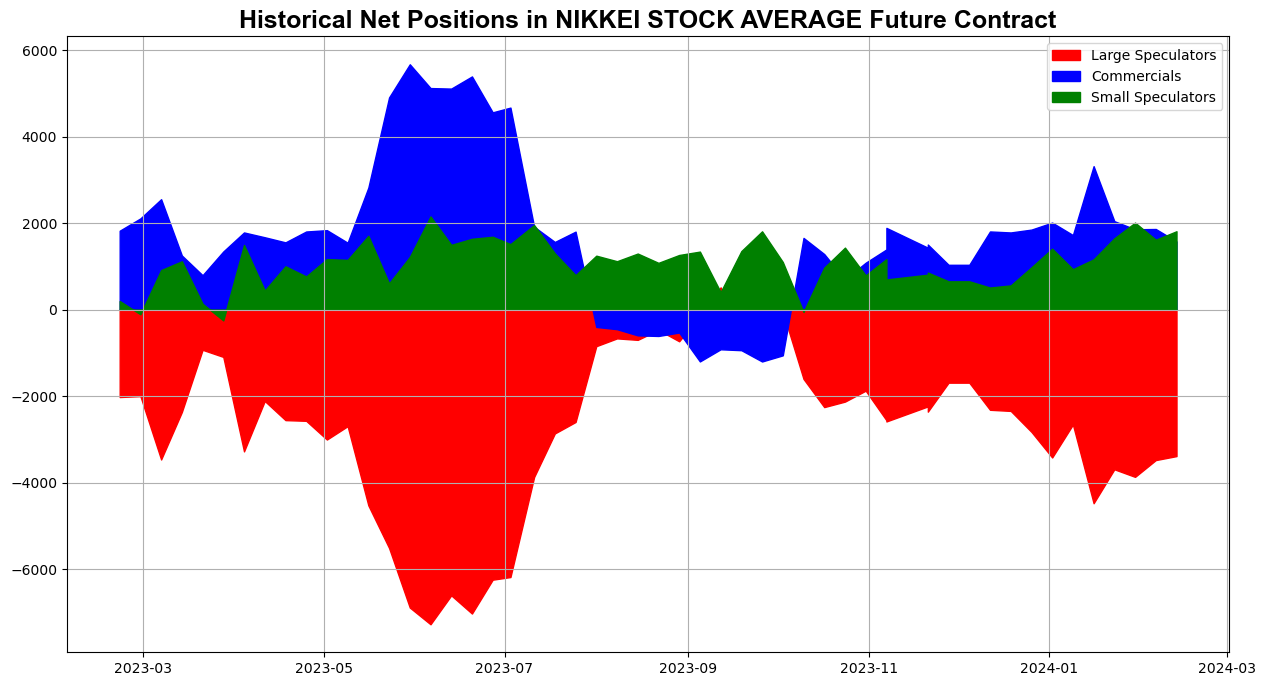

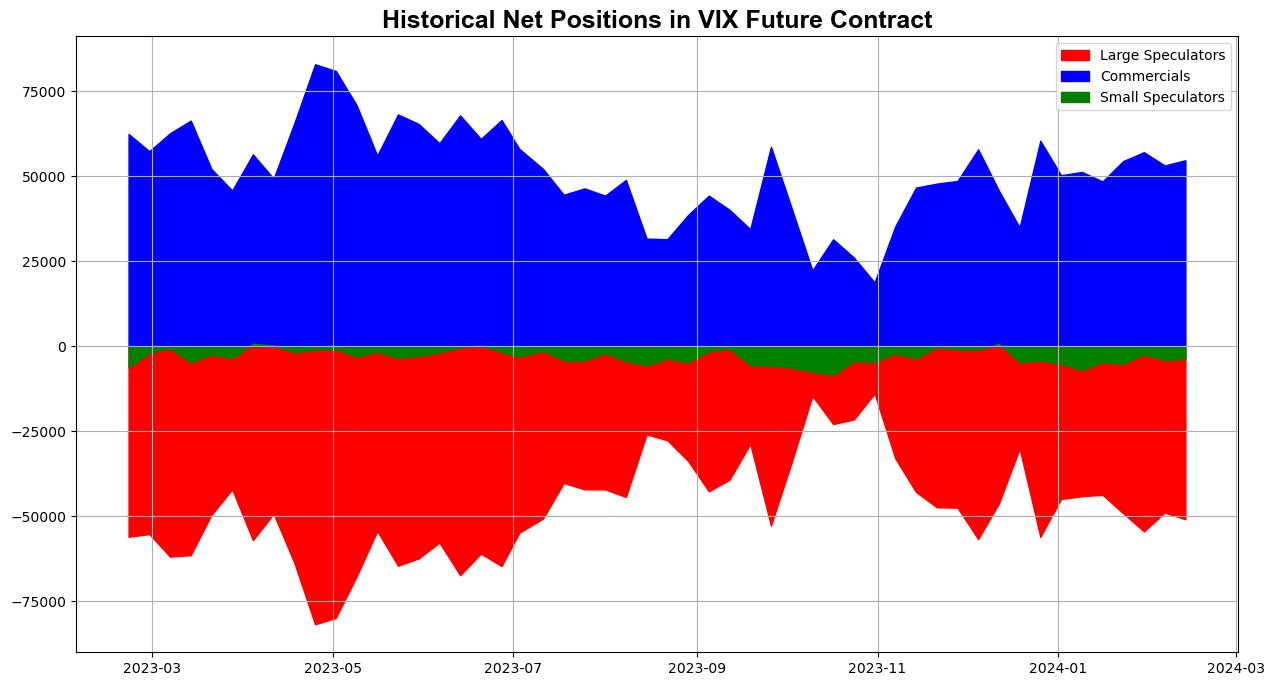

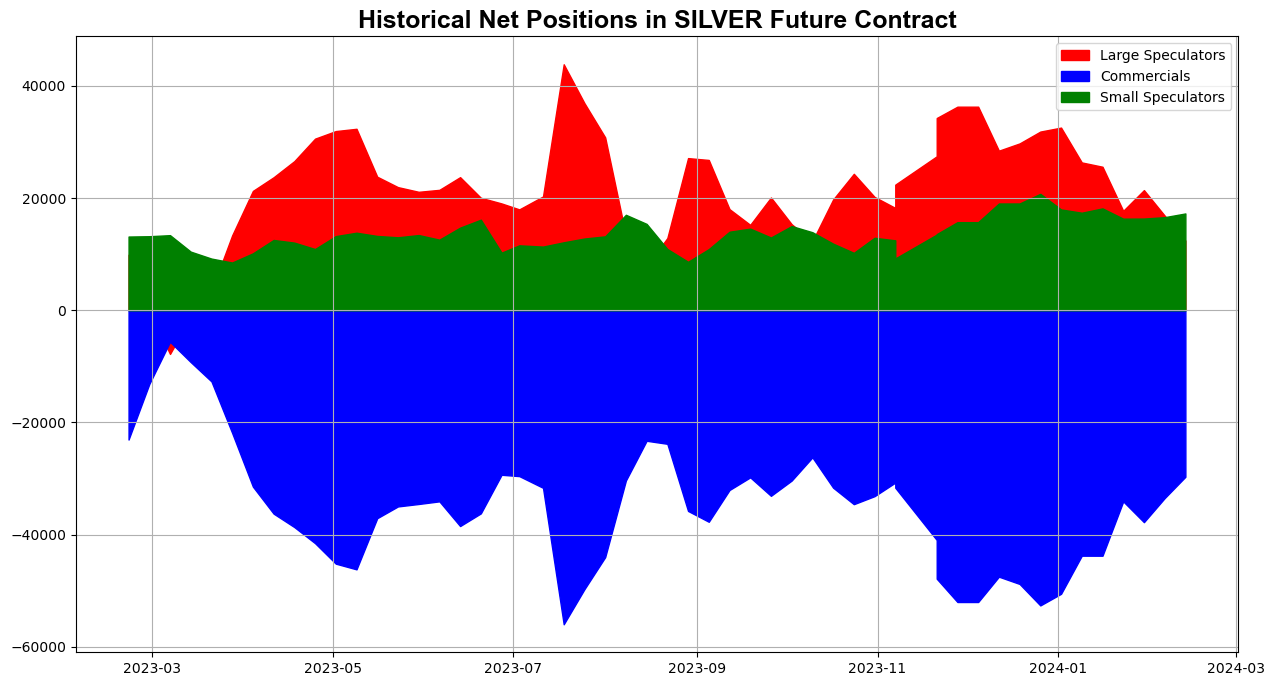

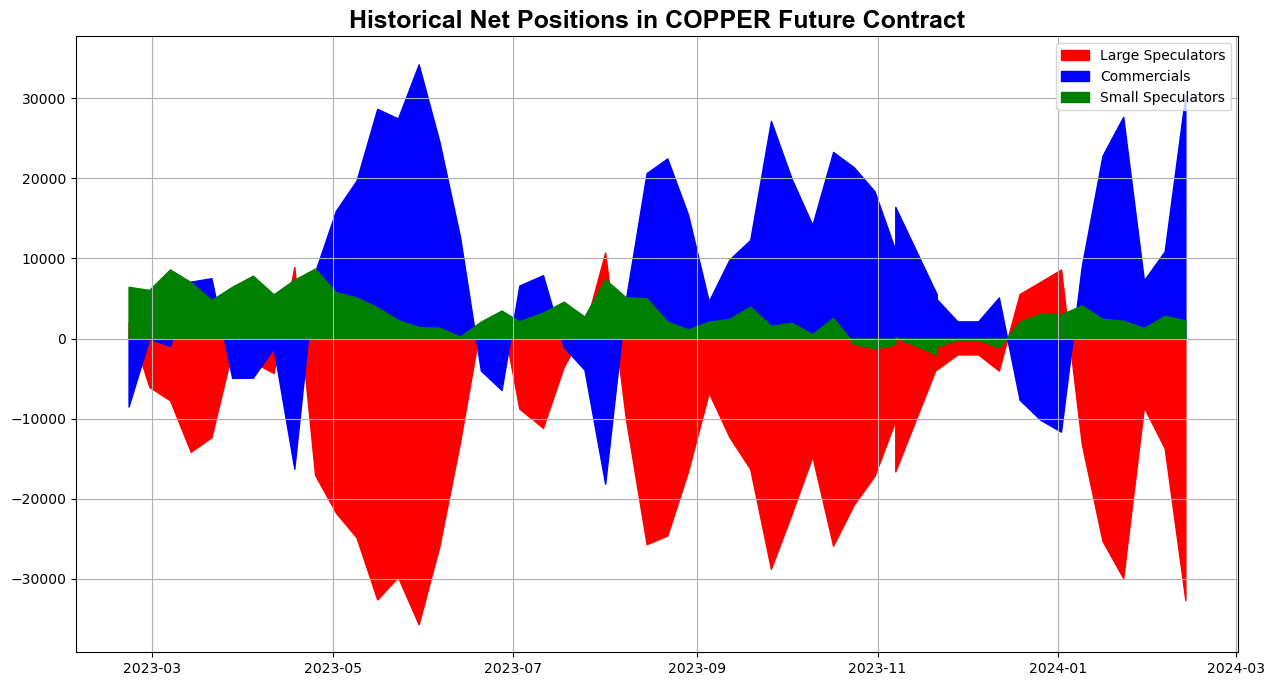

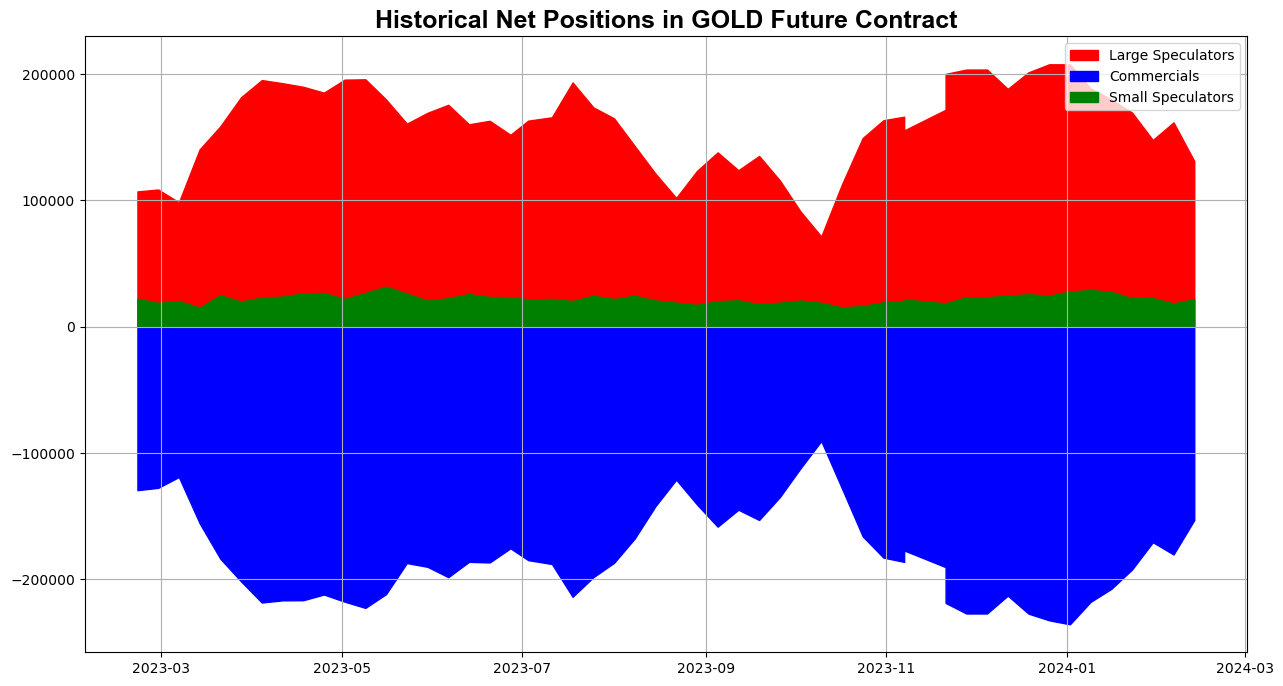

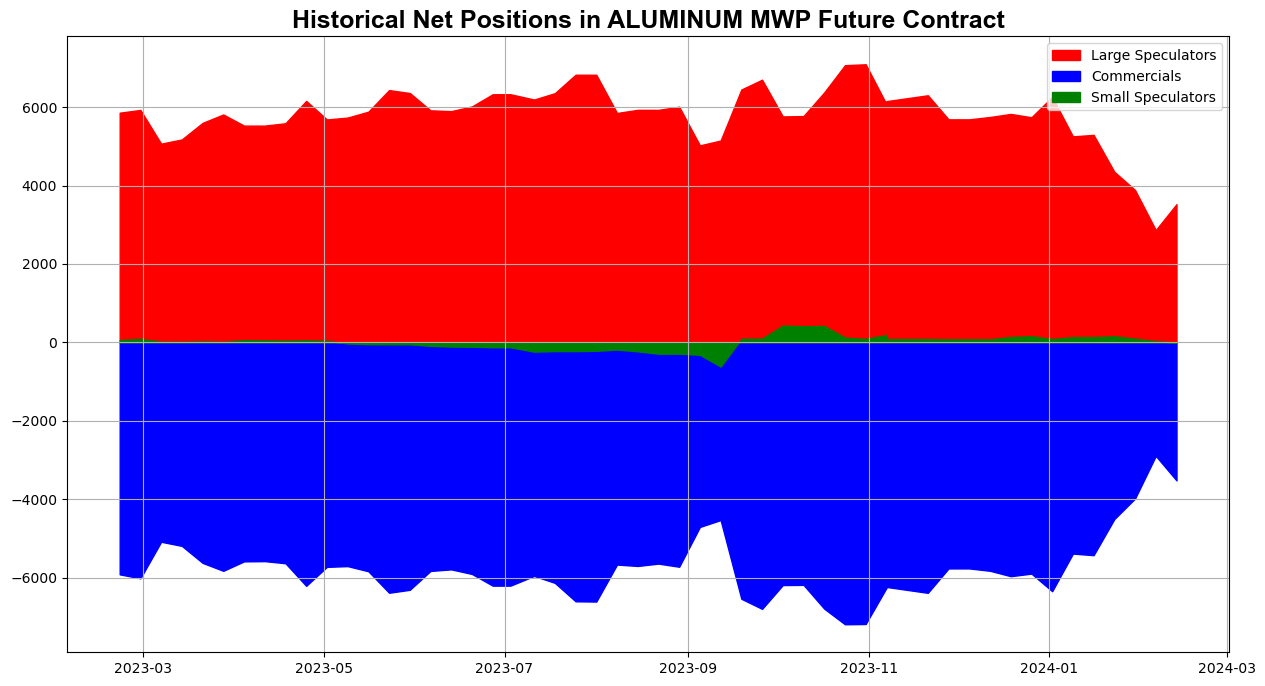

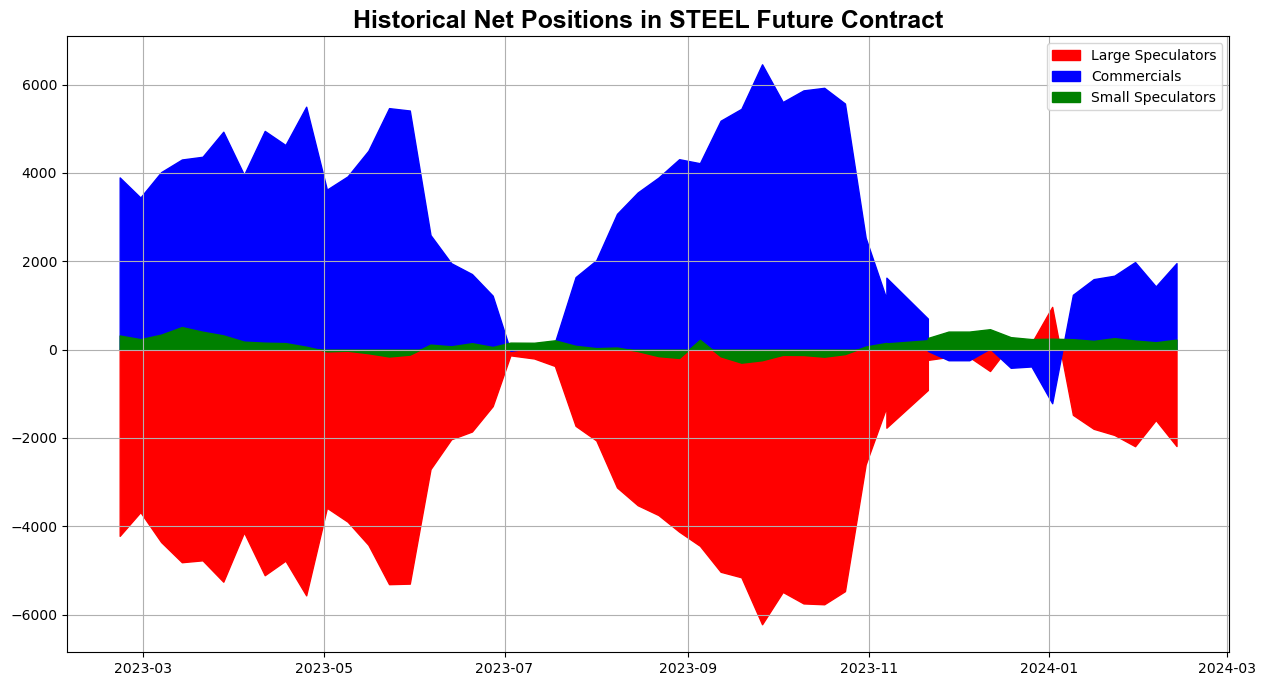

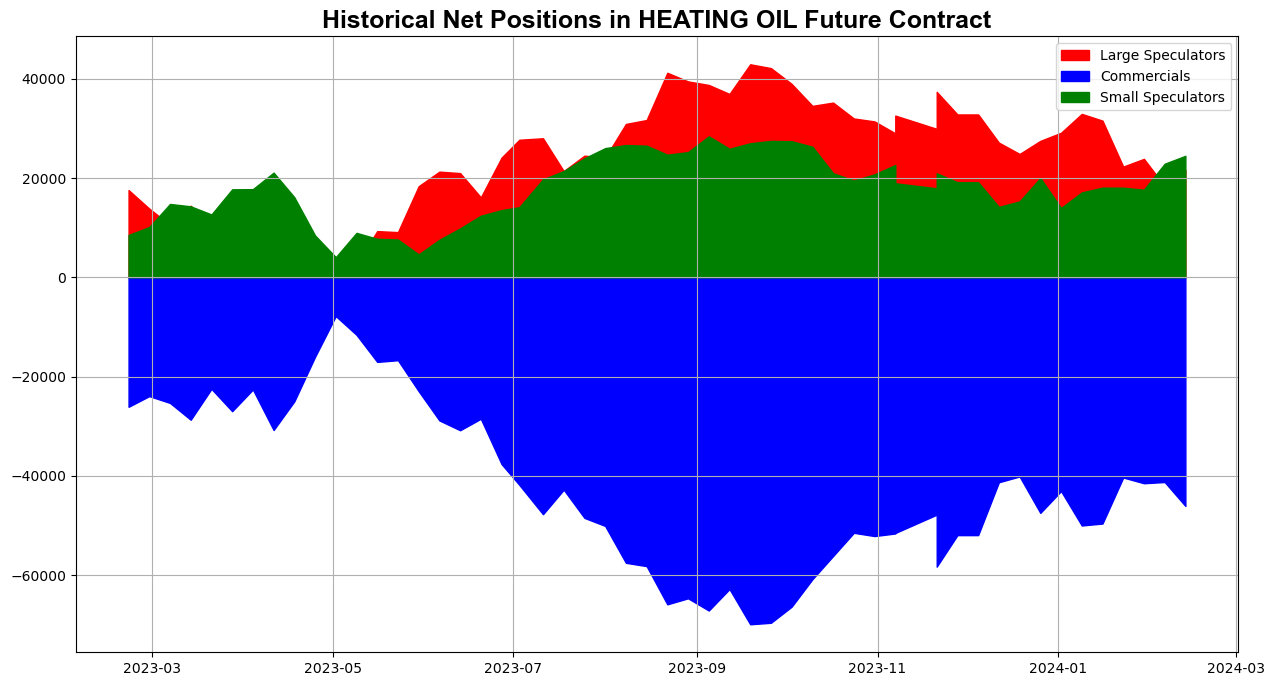

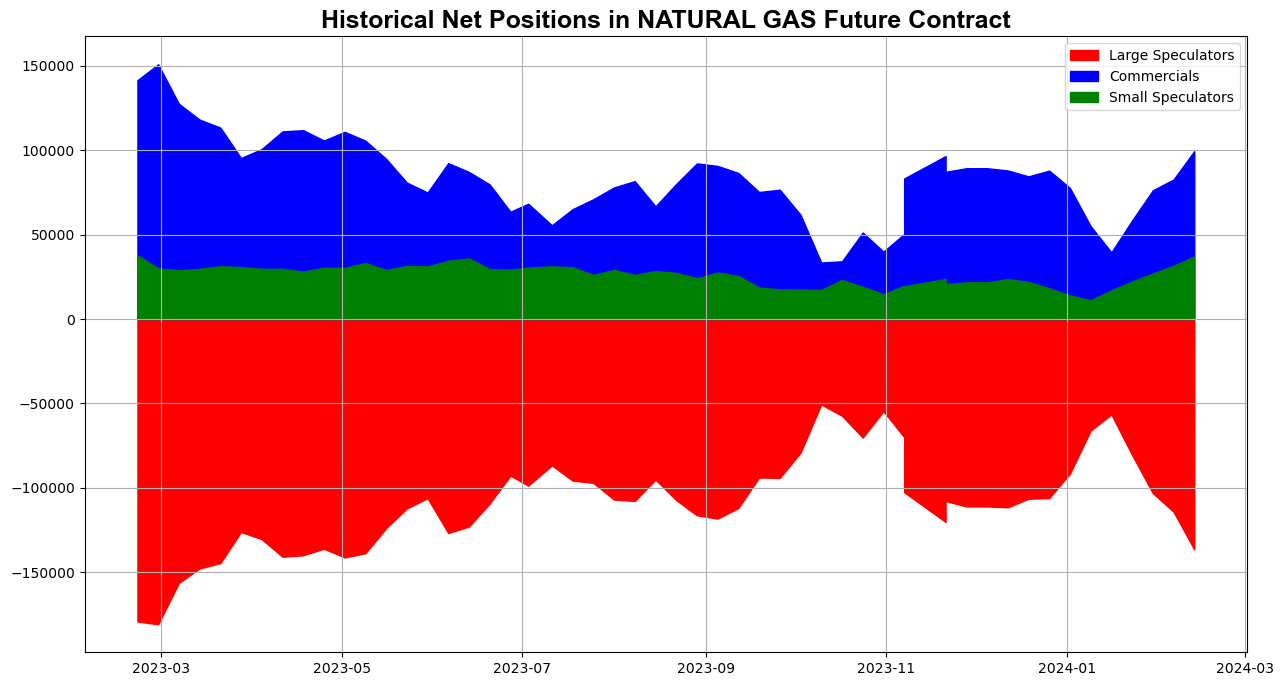

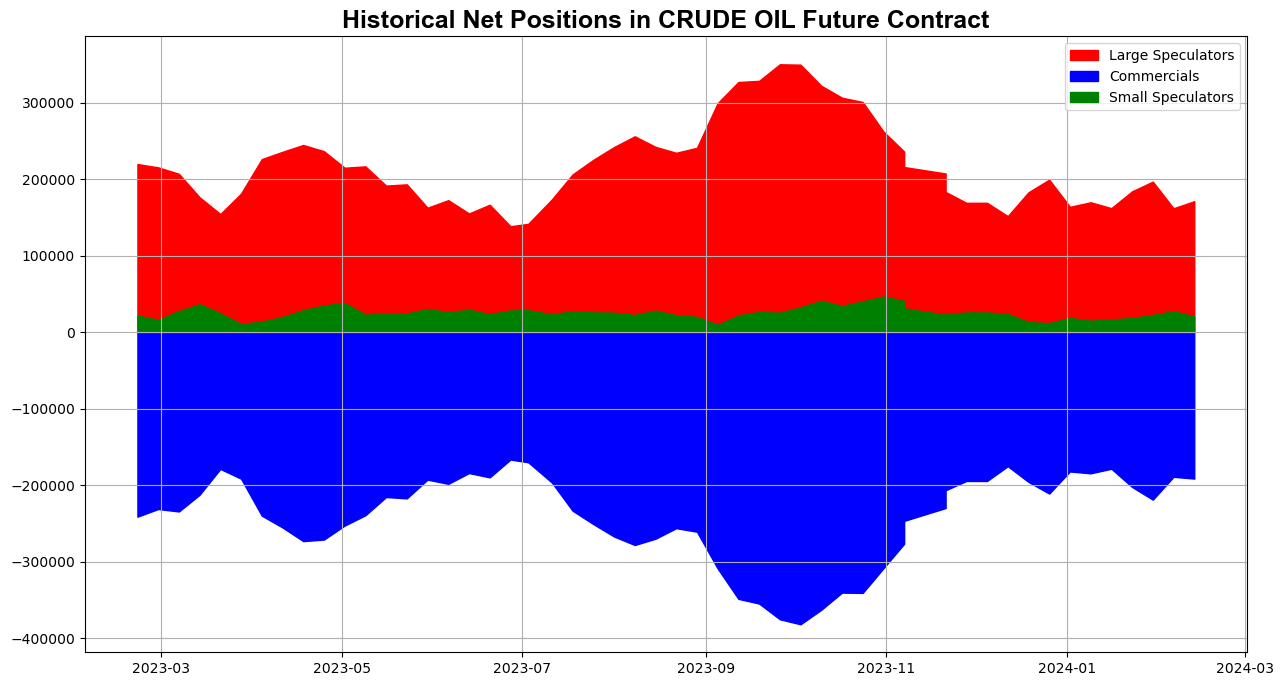

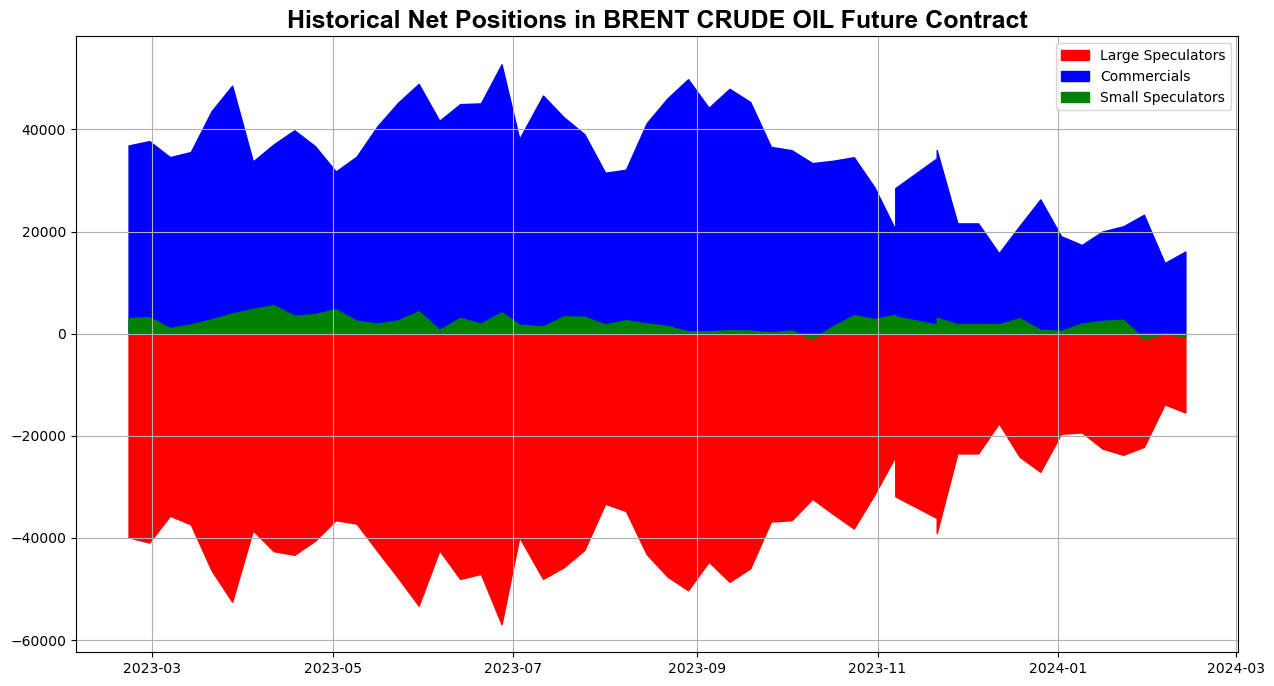

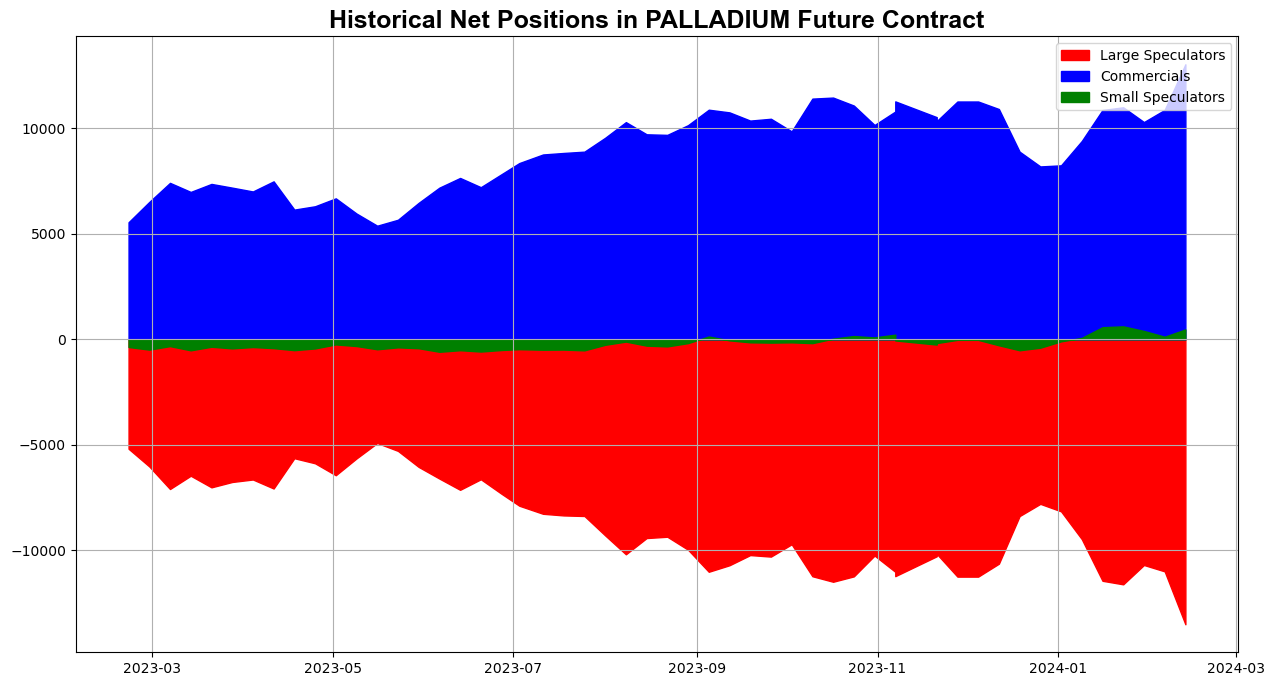

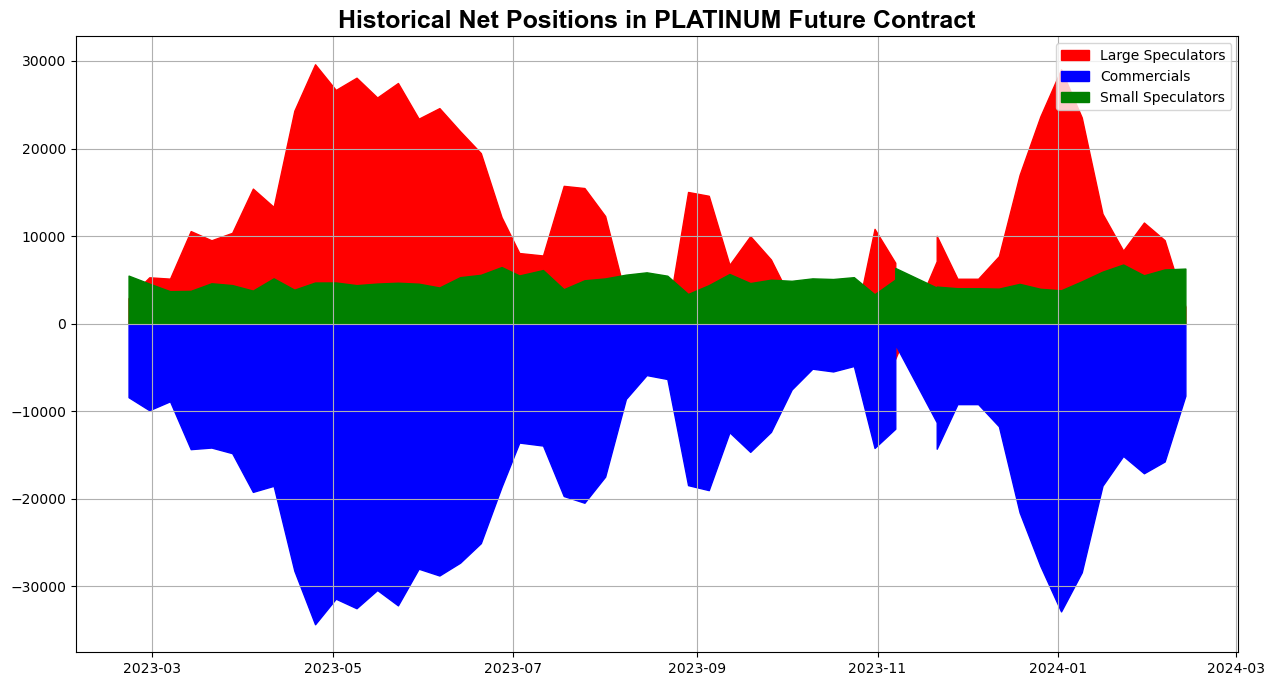

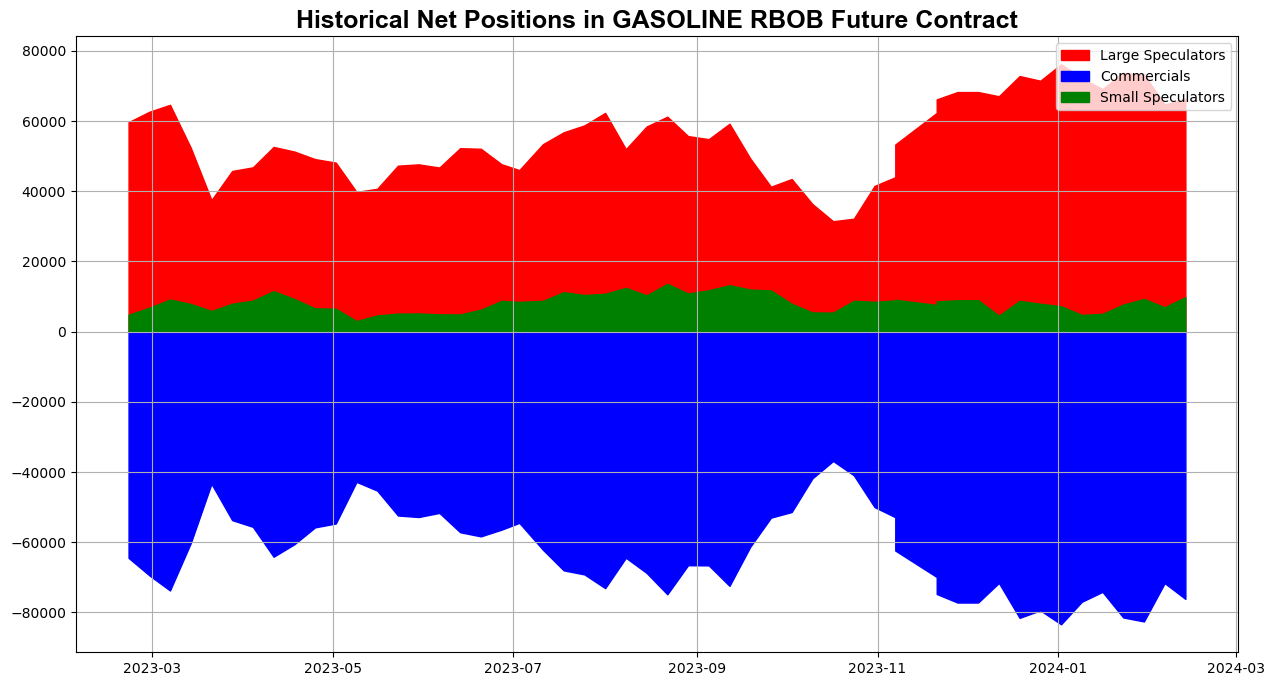

In [29]:
plot_nets(df_commercials,'1 year')